# Ablations and hyper-parameters

In [1]:
import os
import pandas as pd
import numpy as np
import optuna
import plotnine as p9
import sklearn.metrics
import itertools
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Analysis of hyper-parameters

In [2]:
TRIALS = 250
TOP_N = 5

In [3]:
def load_trials(dataset, gnn, llm, method, aggregation):
  
  study_name = f'{dataset}-{gnn}-{llm.replace("/", "-")}-{method}-{aggregation}'
  storage = f'sqlite:///../../pipelines/optuna_studies/{study_name}.db'
  study = optuna.load_study(study_name = study_name, storage = storage)
  
  study_df = study.trials_dataframe()

  study_df = study_df[study_df['value'] >= 0.0].sort_values(by = 'number', ascending = True)
  columns = ['number', 'value'] + [x for x in study_df.columns if x.startswith('params_')] + [x for x in study_df.columns if x.startswith('user_attrs_')]

  return study_df[columns].head(TRIALS).sort_values(by = ['value', 'user_attrs_validation_loss', 'user_attrs_training_loss'], ascending = [False, True, True]).reset_index(drop = True)

### BART-large, Surrogate

In [4]:
df = pd.concat([
  load_trials(dataset = 'IMDb-top_1000', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Surrogate', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'IMDb-1k'),
  load_trials(dataset = 'Ohsumed', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Surrogate', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'Ohsumed'),
  load_trials(dataset = 'R8', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Surrogate', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'R8'),
  load_trials(dataset = 'SST-2', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Surrogate', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'SST-2')
])
df['params_left_stride'] = pd.Categorical(df['params_left_stride'], categories = [0, 32, 64, 128, 256])
df['params_right_stride'] = pd.Categorical(df['params_right_stride'], categories = [0, 32, 64, 128, 256])

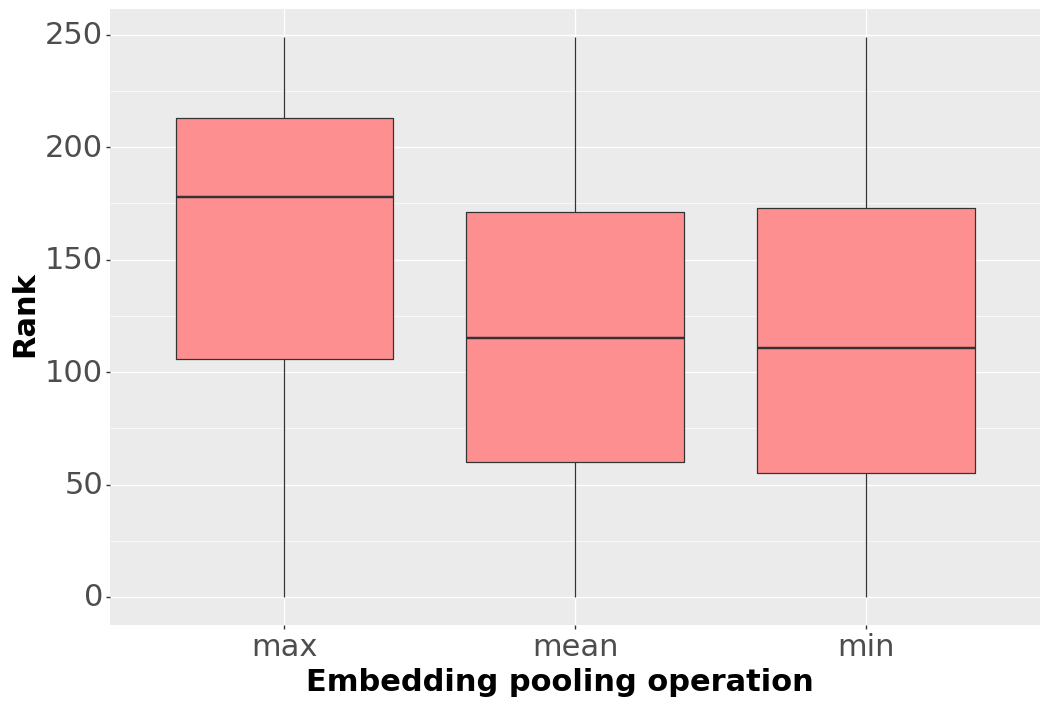

<ggplot: (402515209)>

In [5]:
p9.ggplot(df,
  p9.aes(x = 'params_embedding_pooling_operation', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Embedding pooling operation') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

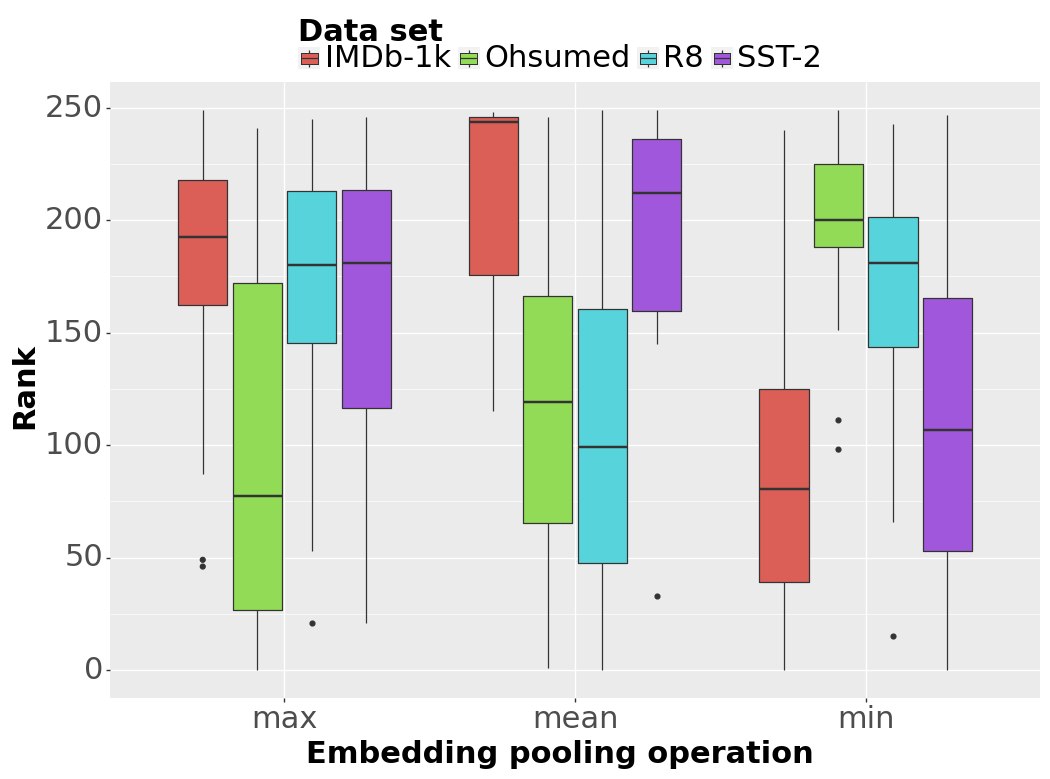

<ggplot: (400589948)>

In [6]:
p9.ggplot(df,
  p9.aes(x = 'params_embedding_pooling_operation', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Embedding pooling operation') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

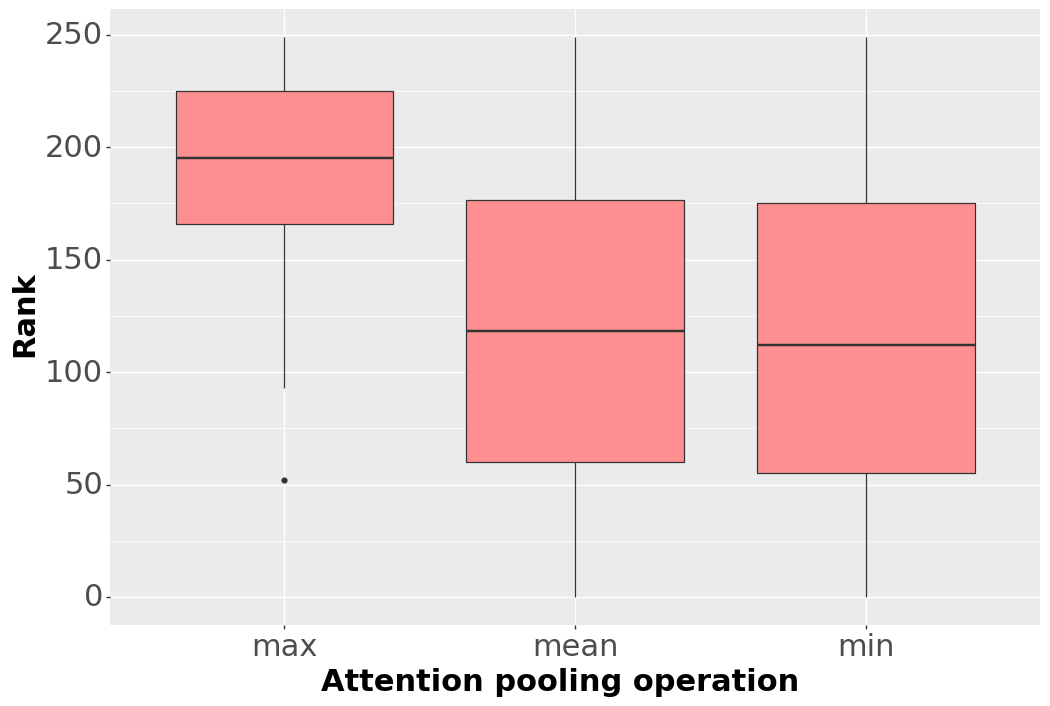

<ggplot: (272550870)>

In [7]:
p9.ggplot(df,
  p9.aes(x = 'params_attention_pooling_operation', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Attention pooling operation') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

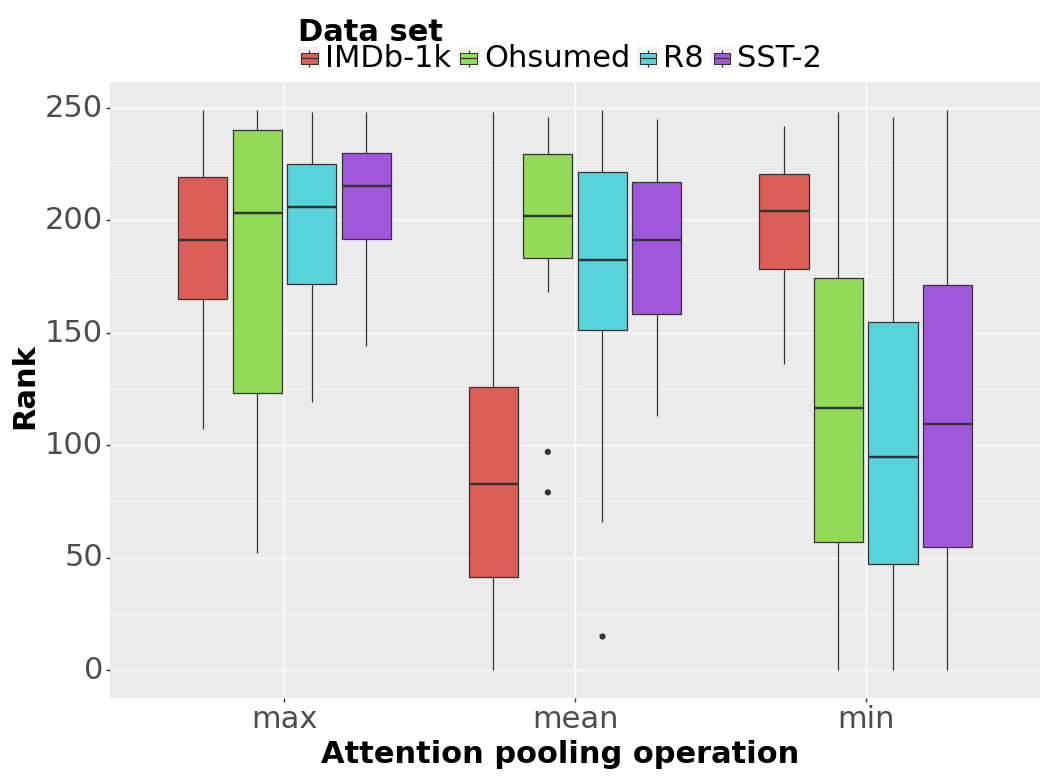

<ggplot: (402155358)>

In [8]:
p9.ggplot(df,
  p9.aes(x = 'params_attention_pooling_operation', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Attention pooling operation') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

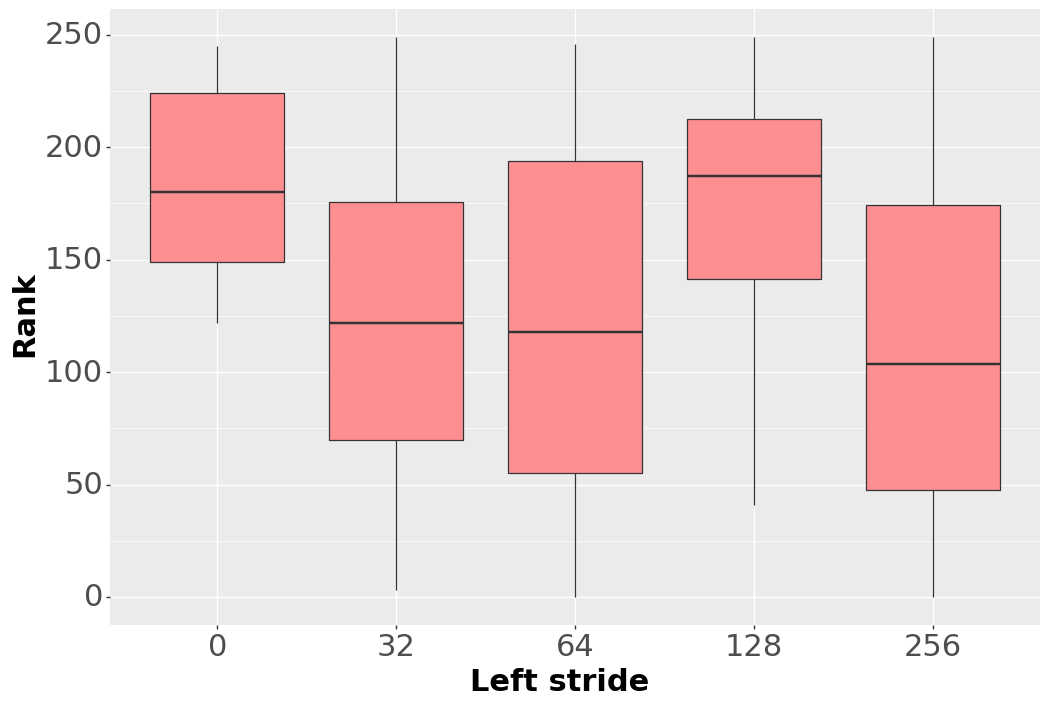

<ggplot: (402446261)>

In [9]:
p9.ggplot(df[['params_left_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_left_stride', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Left stride') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

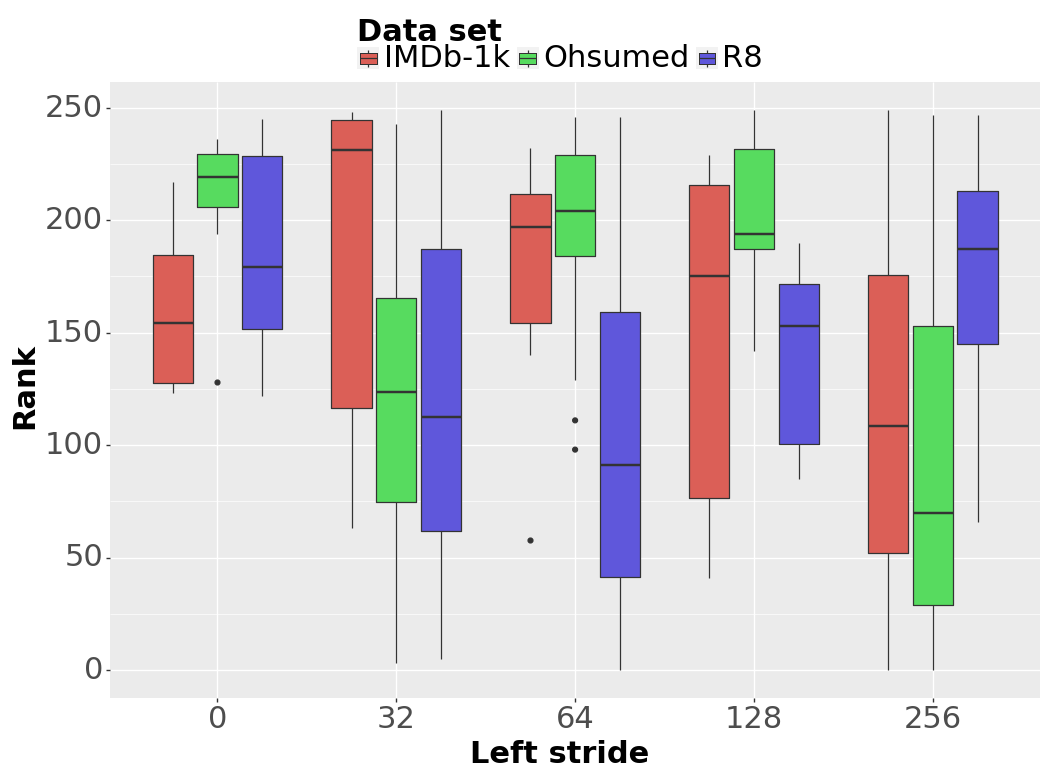

<ggplot: (401013094)>

In [10]:
p9.ggplot(df[['params_left_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_left_stride', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Left stride') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

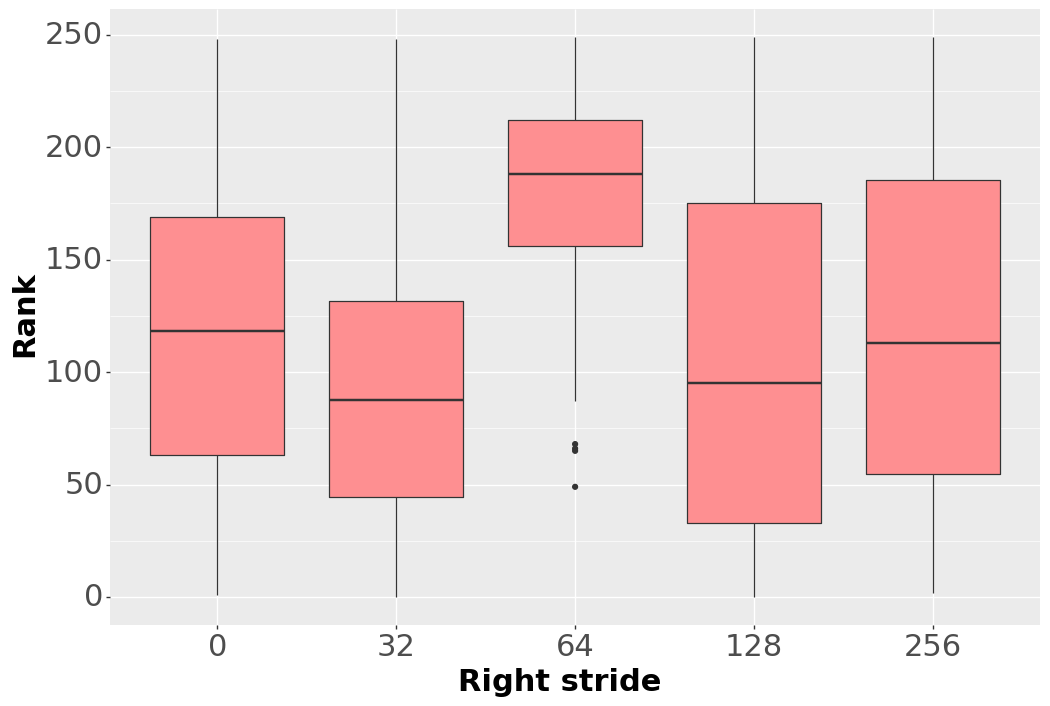

<ggplot: (805431345)>

In [11]:
p9.ggplot(df[['params_right_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_right_stride', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Right stride') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

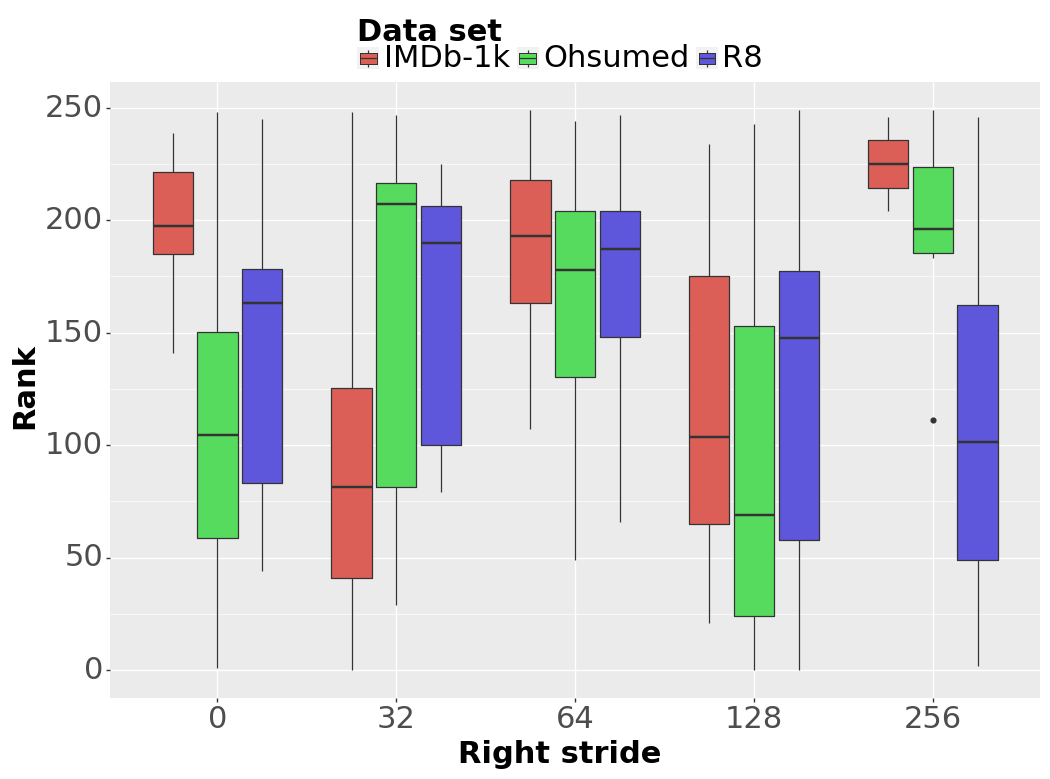

<ggplot: (400584131)>

In [12]:
p9.ggplot(df[['params_right_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_right_stride', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Right stride') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

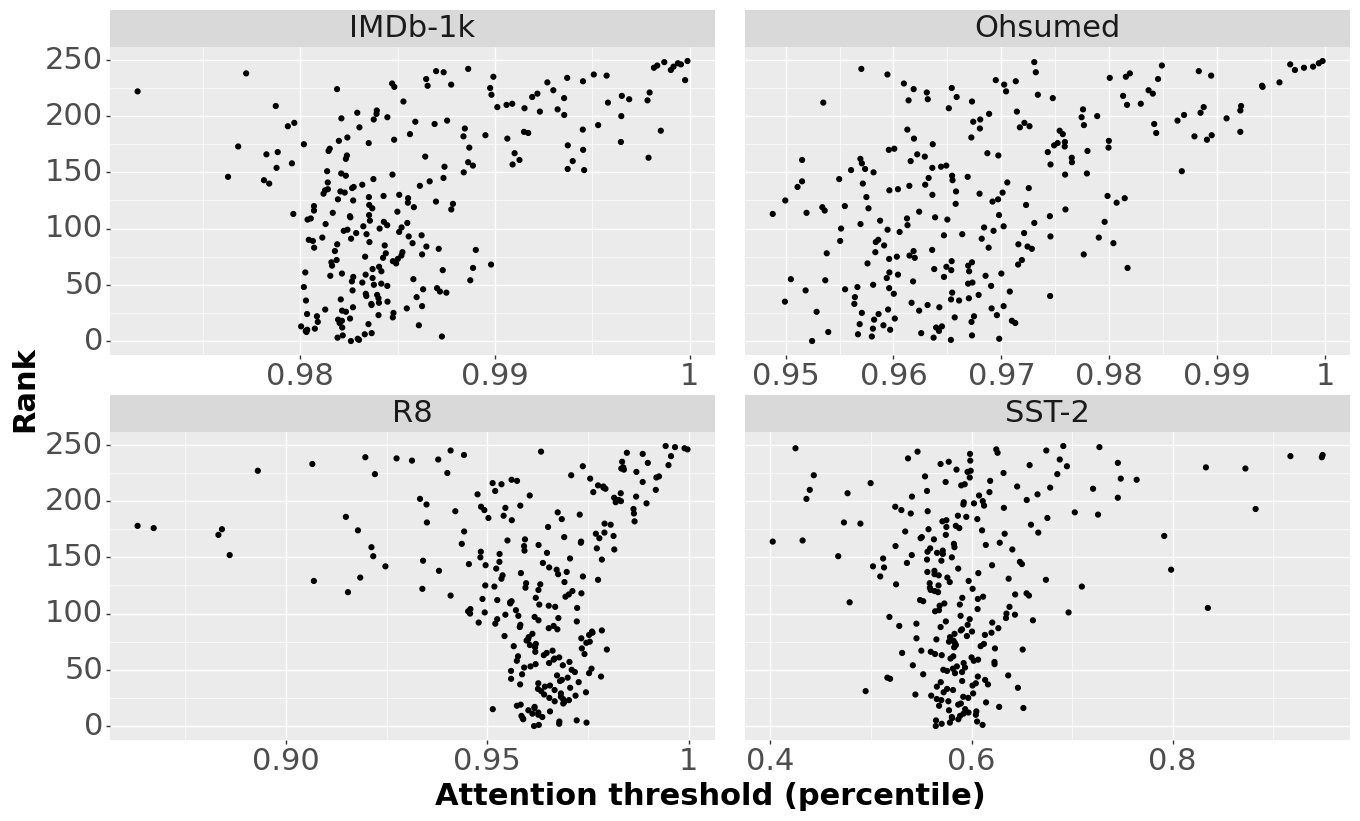

<ggplot: (805456909)>

In [13]:
p9.ggplot(df,
  p9.aes(x = 'params_threshold', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Attention threshold (percentile)') + \
  p9.ylab('Rank') + \
  p9.facet_wrap('~dataset', ncol = 2, scales = 'free_x') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'wspace': 0.05,
      'hspace': 0.25
    }
  )

### BART-large, Grouped

In [14]:
df = pd.concat([
  load_trials(dataset = 'IMDb-top_1000', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Grouped', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'IMDb-1k'),
  load_trials(dataset = 'Ohsumed', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Grouped', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'Ohsumed'),
  load_trials(dataset = 'R8', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Grouped', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'R8'),
  load_trials(dataset = 'SST-2', gnn = 'GATv2', llm = 'facebook-bart-large', method = 'Grouped', aggregation = 'No_Aggregation').reset_index(names = 'rank').assign(dataset = 'SST-2')
])
df['params_left_stride'] = pd.Categorical(df['params_left_stride'], categories = [0, 32, 64, 128, 256])
df['params_right_stride'] = pd.Categorical(df['params_left_stride'], categories = [0, 32, 64, 128, 256])

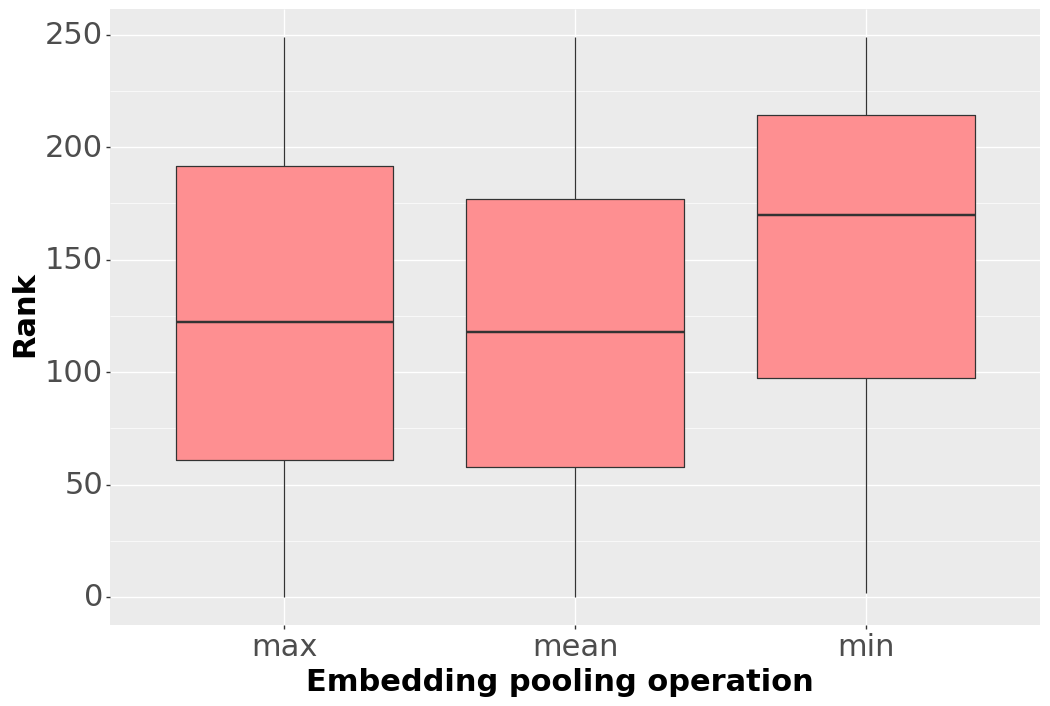

<ggplot: (400590401)>

In [15]:
p9.ggplot(df,
  p9.aes(x = 'params_embedding_pooling_operation', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Embedding pooling operation') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

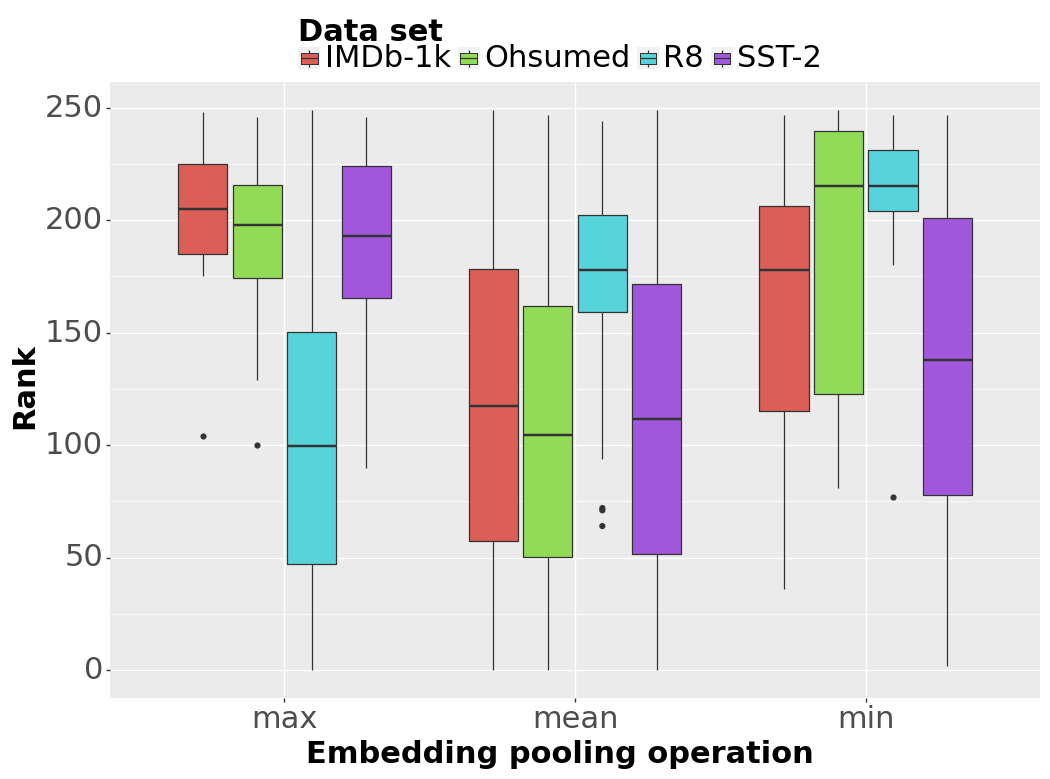

<ggplot: (402578871)>

In [16]:
p9.ggplot(df,
  p9.aes(x = 'params_embedding_pooling_operation', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Embedding pooling operation') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

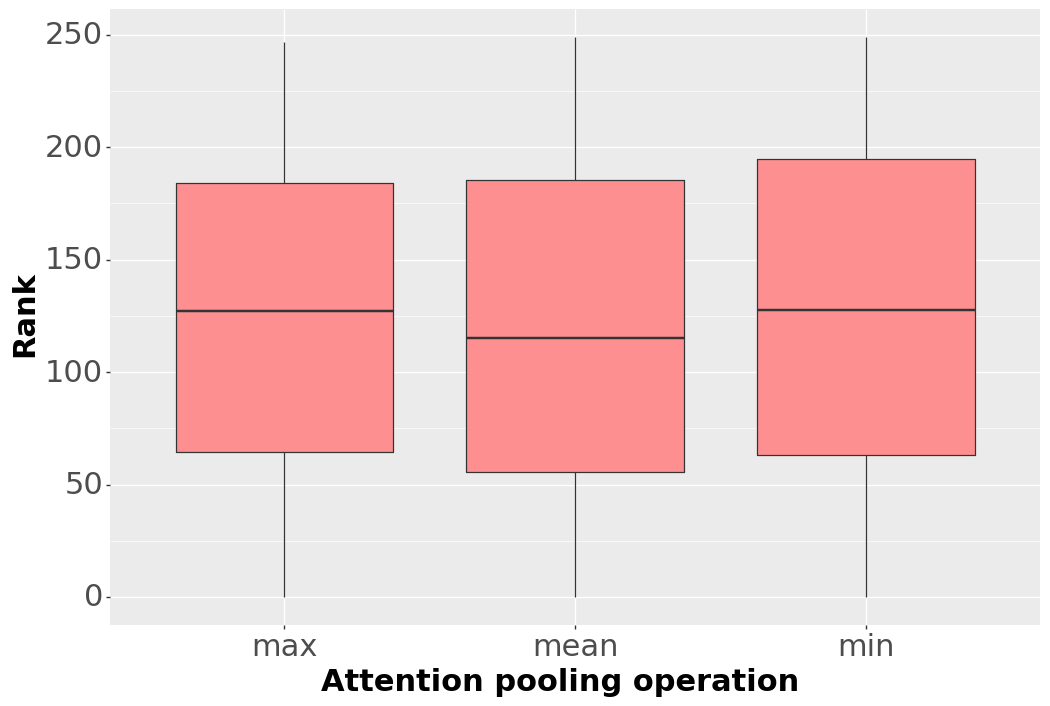

<ggplot: (402164821)>

In [17]:
p9.ggplot(df,
  p9.aes(x = 'params_attention_pooling_operation', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Attention pooling operation') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

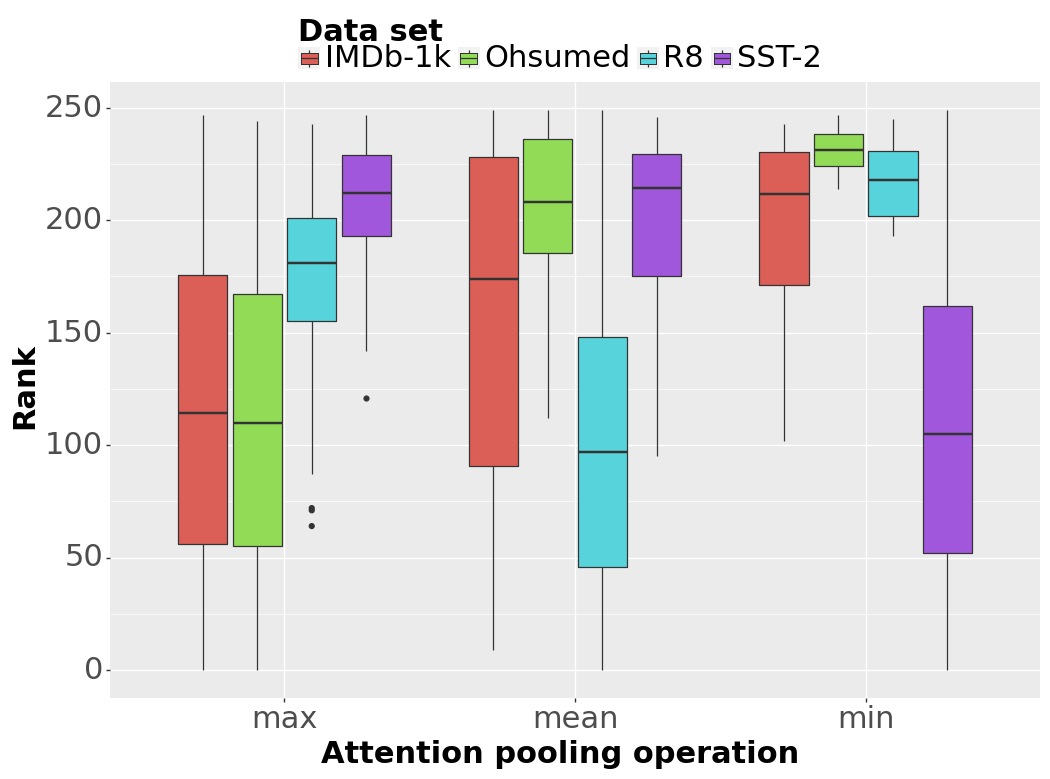

<ggplot: (402538487)>

In [18]:
p9.ggplot(df,
  p9.aes(x = 'params_attention_pooling_operation', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Attention pooling operation') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

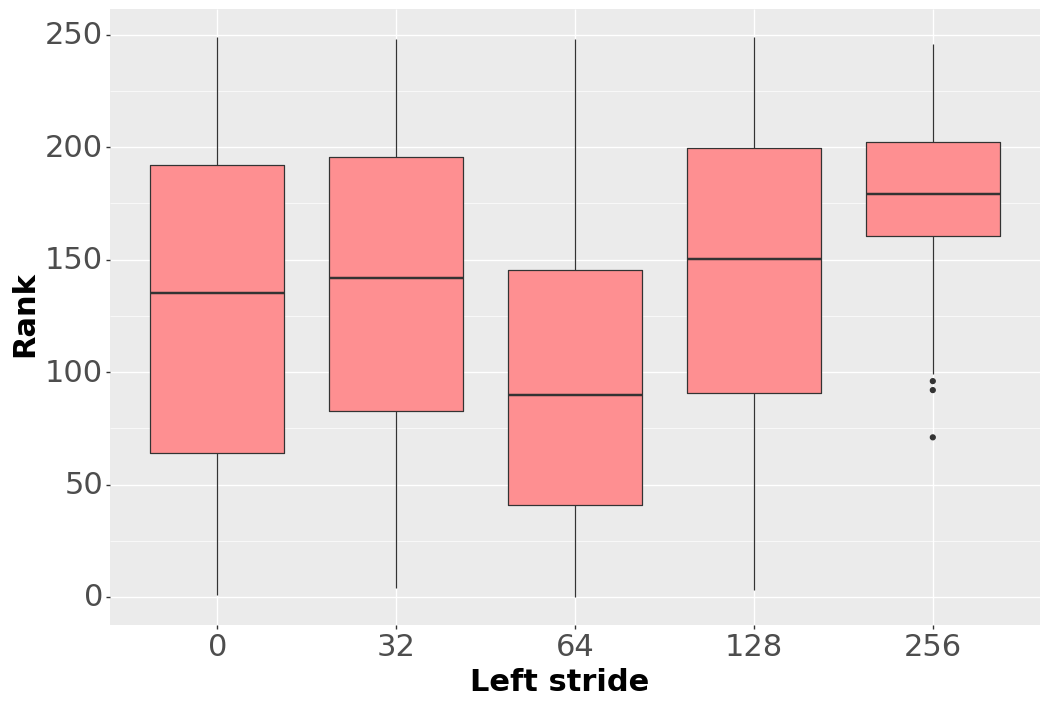

<ggplot: (400181462)>

In [19]:
p9.ggplot(df[['params_left_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_left_stride', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Left stride') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

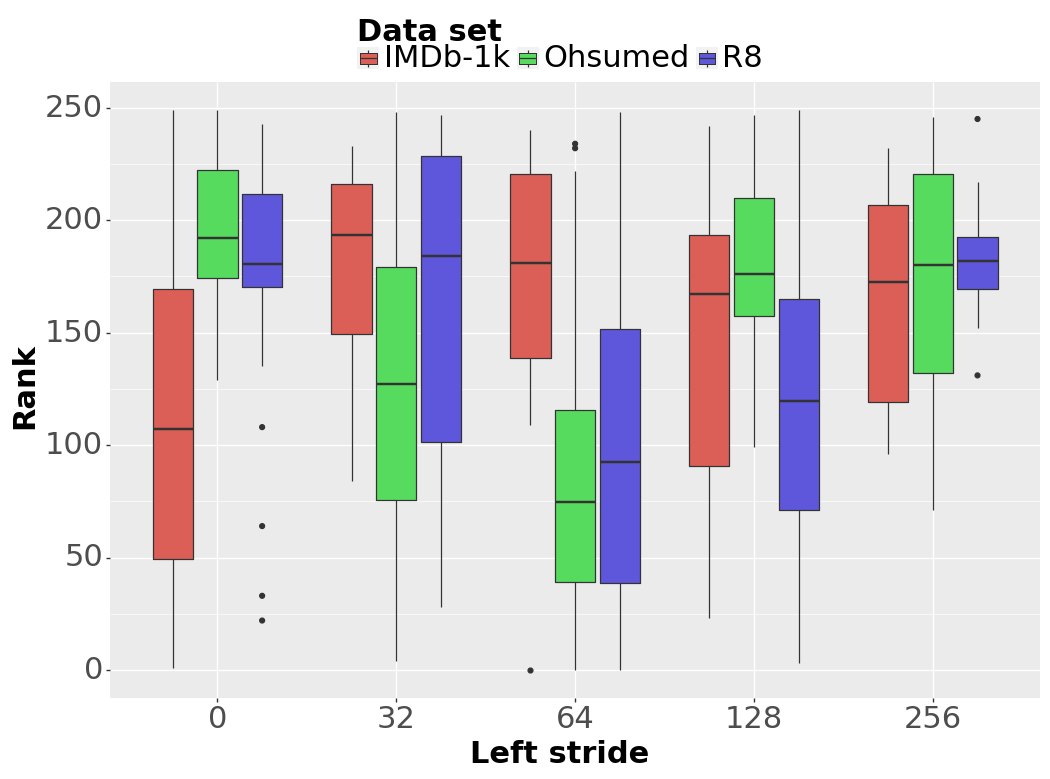

<ggplot: (402300367)>

In [20]:
p9.ggplot(df[['params_left_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_left_stride', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Left stride') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

In [21]:
# plot.save(filename = './figures/sliding_windows_node_count.png', dpi = 300)

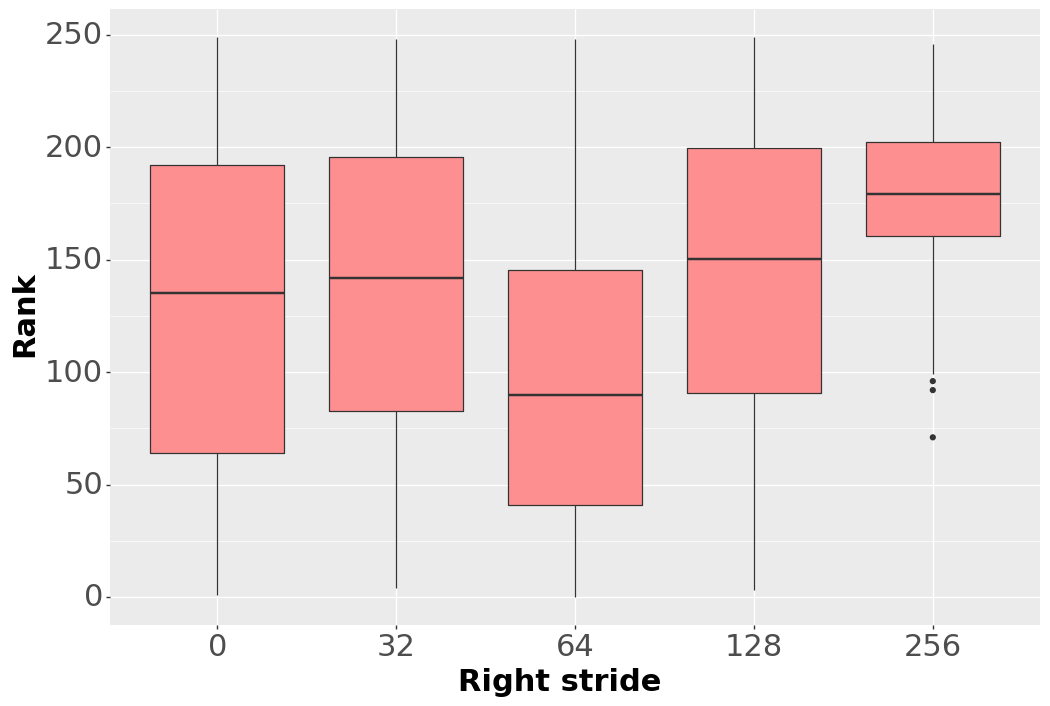

<ggplot: (402268305)>

In [22]:
p9.ggplot(df[['params_right_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_right_stride', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.xlab('Right stride') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

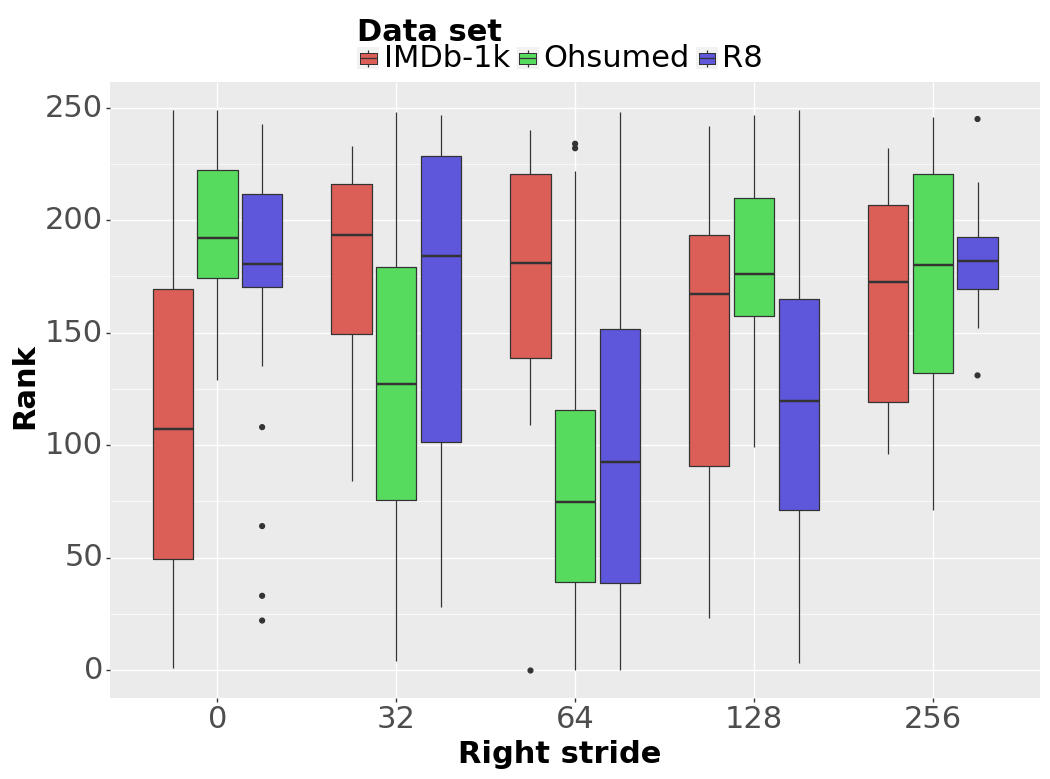

<ggplot: (805513292)>

In [23]:
p9.ggplot(df[['params_right_stride', 'dataset', 'rank']].dropna(),
  p9.aes(x = 'params_right_stride', y = 'rank', fill = 'dataset')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Right stride') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Data set') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

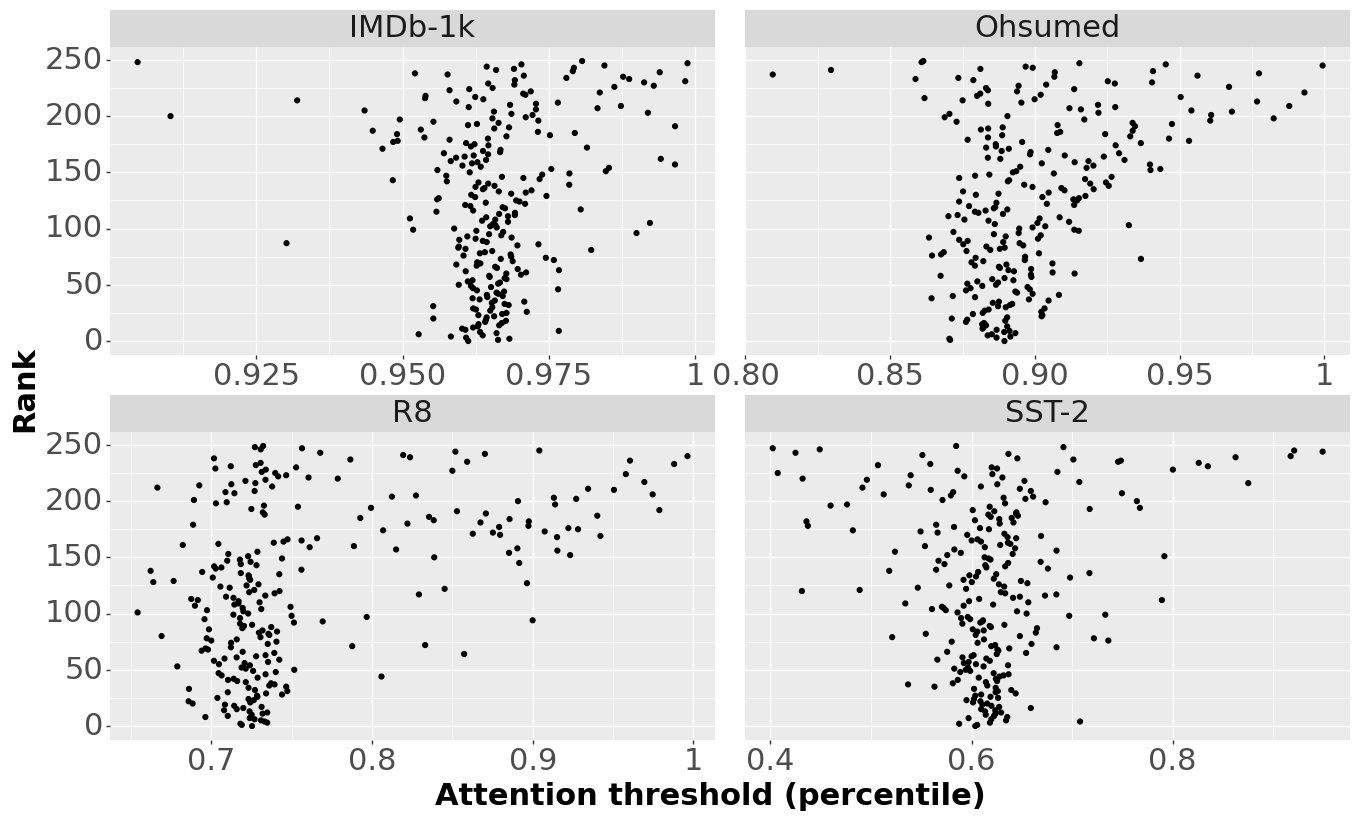

<ggplot: (402457195)>

In [24]:
p9.ggplot(df,
  p9.aes(x = 'params_threshold', y = 'rank')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Attention threshold (percentile)') + \
  p9.ylab('Rank') + \
  p9.facet_wrap('~dataset', ncol = 2, scales = 'free_x') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'wspace': 0.05,
      'hspace': 0.25
    }
  )

## Analysis of ablations

In [4]:
TRIALS = 250
TOP_N = 1

In [5]:
def load_performance_metrics(dataset, gnn, llm, method, aggregation, display_information = False):
  
  study_name = f'{dataset}-{gnn}-{llm.replace("/", "-")}-{method}-{aggregation}'
  storage = f'sqlite:///../../pipelines/optuna_studies/{study_name}.db'
  study = optuna.load_study(study_name = study_name, storage = storage)
  
  study_df = study.trials_dataframe()

  study_df = study_df[study_df['value'] >= 0.0].sort_values(by = 'number', ascending = True)
  columns = ['number', 'value'] + [x for x in study_df.columns if x.startswith('params_')] + [x for x in study_df.columns if x.startswith('user_attrs_')]

  top_trials = study_df[columns].head(TRIALS).sort_values(by = ['value', 'user_attrs_validation_loss', 'user_attrs_training_loss'], ascending = [False, True, True]).head(TOP_N) # .head(3) for R8, BART-large due to exceptions
  
  performance = list()
  #for trial in [x for x in os.listdir(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}') if os.path.isdir(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{x}')]:
  for _, row in top_trials.iterrows():
    
    if display_information:
      print(row)
    trial = row['number']

    for random_state in [x for x in os.listdir(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{trial}') if os.path.isdir(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{trial}/{x}')]:
      df = pd.read_csv(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{trial}/{random_state}/predictions.csv')
      for split in ['validation', 'test']:
        df_split = df[df['split'] == split]
        accuracy = sklearn.metrics.accuracy_score(df_split['real'], df_split['prediction'])
        f1_score = sklearn.metrics.f1_score(df_split['real'], df_split['prediction'], average = 'macro')
        precision = sklearn.metrics.precision_score(df_split['real'], df_split['prediction'], average = 'macro')
        recall = sklearn.metrics.recall_score(df_split['real'], df_split['prediction'], average = 'macro')
        performance.append((trial, random_state, split, accuracy, f1_score, precision, recall))
  return pd.DataFrame(performance, columns = ['trial', 'random_state', 'split', 'accuracy', 'f1_score', 'precision', 'recall'])

In [6]:
def load_performance_metrics_ablation(dataset, gnn, llm, method, aggregation, ablation_operation, node_ablation_noise_level, node_ablation_feature_noise_level, display_information = False):
  
  study_name = f'{dataset}-{gnn}-{llm.replace("/", "-")}-{method}-{aggregation}-{ablation_operation}-{node_ablation_noise_level}-{node_ablation_feature_noise_level}'
  storage = f'sqlite:///../../ablations/optuna_studies/{study_name}.db'
  study = optuna.load_study(study_name = study_name, storage = storage)
  
  study_df = study.trials_dataframe()

  study_df = study_df[study_df['value'] >= 0.0].sort_values(by = 'number', ascending = True)
  columns = ['number', 'value'] + [x for x in study_df.columns if x.startswith('params_')] + [x for x in study_df.columns if x.startswith('user_attrs_')]

  top_trials = study_df[columns].head(TRIALS).sort_values(by = ['value', 'user_attrs_validation_loss', 'user_attrs_training_loss'], ascending = [False, True, True]).head(TOP_N)# .head(3) for R8, BART-large due to exceptions
  
  performance = list()
  for _, row in top_trials.iterrows():
    
    if display_information:
      print(row)
    trial = row['number']

    for random_state in [x for x in os.listdir(f'../../ablation_outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{ablation_operation}/{node_ablation_noise_level}-{node_ablation_feature_noise_level}/{trial}') if os.path.isdir(f'../../ablation_outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{ablation_operation}/{node_ablation_noise_level}-{node_ablation_feature_noise_level}/{trial}/{x}')]:
      df = pd.read_csv(f'../../ablation_outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{ablation_operation}/{node_ablation_noise_level}-{node_ablation_feature_noise_level}/{trial}/{random_state}/predictions.csv')
      for split in ['validation', 'test']:
        df_split = df[df['split'] == split]
        accuracy = sklearn.metrics.accuracy_score(df_split['real'], df_split['prediction'])
        f1_score = sklearn.metrics.f1_score(df_split['real'], df_split['prediction'], average = 'macro')
        precision = sklearn.metrics.precision_score(df_split['real'], df_split['prediction'], average = 'macro')
        recall = sklearn.metrics.recall_score(df_split['real'], df_split['prediction'], average = 'macro')
        performance.append((trial, random_state, split, accuracy, f1_score, precision, recall))
  return pd.DataFrame(performance, columns = ['trial', 'random_state', 'split', 'accuracy', 'f1_score', 'precision', 'recall'])

In [7]:
def remove_trials_with_exceptions(df):
  return df.groupby(['trial']).filter(lambda x : len(x) >= 10 * 2).reset_index(drop = True)

In [8]:
def get_best_results_ablation(dataset, gnn, llm, method, aggregation, ablation_operation, node_ablation_noise_level, node_ablation_feature_noise_level, target_metric):
  df = load_performance_metrics_ablation(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation, ablation_operation = ablation_operation, node_ablation_noise_level = node_ablation_noise_level, node_ablation_feature_noise_level = node_ablation_feature_noise_level, display_information = True)
  df = remove_trials_with_exceptions(df)
  df_aggregated = df.groupby(['trial', 'split']).agg({
    'accuracy' : ['mean', 'std', 'max'],
    'f1_score' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
  }).reset_index()
  df_aggregated.columns = df_aggregated.columns.map('_'.join).str.strip('_')
  
  best_trial_number = df_aggregated.sort_values(by = ['split', f'{target_metric}_mean', f'{target_metric}_std'], ascending = [True, False, True]).reset_index(drop = True).iloc[0]['trial']

  best_trial = df_aggregated[df_aggregated['trial'] == best_trial_number]

  print(best_trial_number)
  print('-' * 10, 'Validation', '-' * 10)

  print(
    'Accuracy:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['accuracy_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['accuracy_std'].values[0] * 100, decimals = 2))
  )
  print(
    'F1-score:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['f1_score_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['f1_score_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Precision:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['precision_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['precision_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Recall:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['recall_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['recall_std'].values[0] * 100, decimals = 2))
  )

  print('-' * 10, 'Test', '-' * 10)

  print(
    'Accuracy:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['accuracy_mean'].values[0] * 100, decimals = 2)),
    '±', 
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['accuracy_std'].values[0] * 100, decimals = 2))
  )
  print(
    'F1-score:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['f1_score_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['f1_score_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Precision:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['precision_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['precision_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Recall:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['recall_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['recall_std'].values[0] * 100, decimals = 2))
  )

In [9]:
def get_best_results(dataset, gnn, llm, method, aggregation, target_metric):
  df = load_performance_metrics(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation, display_information = True)
  df = remove_trials_with_exceptions(df)
  df_aggregated = df.groupby(['trial', 'split']).agg({
    'accuracy' : ['mean', 'std'],
    'f1_score' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
  }).reset_index()
  df_aggregated.columns = df_aggregated.columns.map('_'.join).str.strip('_')
  
  best_trial_number = df_aggregated.sort_values(by = ['split', f'{target_metric}_mean', f'{target_metric}_std'], ascending = [True, False, True]).reset_index(drop = True).iloc[0]['trial']

  best_trial = df_aggregated[df_aggregated['trial'] == best_trial_number]

  print(best_trial_number)
  print('-' * 10, 'Validation', '-' * 10)

  print(
    'Accuracy:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['accuracy_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['accuracy_std'].values[0] * 100, decimals = 2))
  )
  print(
    'F1-score:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['f1_score_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['f1_score_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Precision:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['precision_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['precision_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Recall:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['recall_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'validation']['recall_std'].values[0] * 100, decimals = 2))
  )

  print('-' * 10, 'Test', '-' * 10)

  print(
    'Accuracy:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['accuracy_mean'].values[0] * 100, decimals = 2)),
    '±', 
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['accuracy_std'].values[0] * 100, decimals = 2))
  )
  print(
    'F1-score:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['f1_score_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['f1_score_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Precision:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['precision_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['precision_std'].values[0] * 100, decimals = 2))
  )
  print(
    'Recall:',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['recall_mean'].values[0] * 100, decimals = 2)),
    '±',
    '{:.2f}'.format(np.round(best_trial[best_trial['split'] == 'test']['recall_std'].values[0] * 100, decimals = 2))
  )


### Ablations over edges

### SST-2

In [9]:
get_best_results(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  target_metric = 'accuracy'
)

number                                     221
value                                  0.91055
params_attention_heads                       7
params_attention_pooling_operation         min
params_balanced_loss                      True
params_batch_size                           67
params_beta_0                         0.836906
params_beta_1                         0.988719
params_dropout_rate                   0.469089
params_early_stopping_patience              23
params_embedding_pooling_operation         max
params_epochs                               69
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    238
params_learning_rate                  0.000592
params_number_of_hidden_layers               2
params_plateau_divider                       6
params_plateau_patience                     19
params_threshold                      0.574329
params_weight_decay                   0.000125
user_attrs_ep

In [10]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                      93
value                                 0.920872
params_attention_heads                      16
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           88
params_beta_0                         0.840789
params_beta_1                         0.998809
params_dropout_rate                   0.457248
params_early_stopping_patience              11
params_embedding_pooling_operation         min
params_epochs                               96
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                    206
params_learning_rate                  0.001134
params_number_of_hidden_layers               1
params_plateau_divider                       6
params_plateau_patience                     22
params_threshold                      0.493903
params_weight_decay                   0.000103
user_attrs_ep

In [11]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     119
value                                 0.915138
params_attention_heads                      14
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           60
params_beta_0                         0.818066
params_beta_1                         0.988065
params_dropout_rate                   0.572643
params_early_stopping_patience              24
params_embedding_pooling_operation         min
params_epochs                               65
params_epsilon                        0.000001
params_global_pooling                      max
params_hidden_dimension                    186
params_learning_rate                  0.000751
params_number_of_hidden_layers               1
params_plateau_divider                       8
params_plateau_patience                     25
params_threshold                      0.536645
params_weight_decay                   0.000582
user_attrs_ep

In [12]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                      87
value                                 0.915138
params_attention_heads                      12
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                          169
params_beta_0                         0.859238
params_beta_1                         0.998361
params_dropout_rate                   0.474901
params_early_stopping_patience              20
params_embedding_pooling_operation         max
params_epochs                              137
params_epsilon                        0.000013
params_global_pooling                      max
params_hidden_dimension                    159
params_learning_rate                  0.001148
params_number_of_hidden_layers               2
params_plateau_divider                       4
params_plateau_patience                     21
params_threshold                      0.436154
params_weight_decay                   0.000417
user_attrs_ep

In [13]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     236
value                                 0.909404
params_attention_heads                       8
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                          131
params_beta_0                         0.864609
params_beta_1                          0.98051
params_dropout_rate                   0.419923
params_early_stopping_patience              14
params_embedding_pooling_operation         min
params_epochs                               54
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                    146
params_learning_rate                  0.000875
params_number_of_hidden_layers               2
params_plateau_divider                       7
params_plateau_patience                     11
params_threshold                      0.553471
params_weight_decay                   0.000222
user_attrs_ep

In [14]:
get_best_results(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  target_metric = 'accuracy'
)

number                                     255
value                                 0.912844
params_attention_heads                      16
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           77
params_beta_0                         0.834165
params_beta_1                         0.981367
params_dropout_rate                   0.454022
params_early_stopping_patience              15
params_embedding_pooling_operation         max
params_epochs                              197
params_epsilon                        0.000002
params_global_pooling                     mean
params_hidden_dimension                    196
params_learning_rate                  0.001156
params_number_of_hidden_layers               3
params_plateau_divider                       5
params_plateau_patience                     11
params_threshold                       0.48984
params_weight_decay                   0.000007
user_attrs_ep

In [15]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     227
value                                 0.912844
params_attention_heads                      13
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           93
params_beta_0                         0.871478
params_beta_1                          0.98913
params_dropout_rate                   0.446344
params_early_stopping_patience              17
params_embedding_pooling_operation         min
params_epochs                              191
params_epsilon                        0.000019
params_global_pooling                      max
params_hidden_dimension                    204
params_learning_rate                  0.000912
params_number_of_hidden_layers               3
params_plateau_divider                       3
params_plateau_patience                     17
params_threshold                      0.515557
params_weight_decay                   0.000004
user_attrs_ep

In [16]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     115
value                                 0.911697
params_attention_heads                       8
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           59
params_beta_0                         0.842721
params_beta_1                         0.982764
params_dropout_rate                   0.434957
params_early_stopping_patience              24
params_embedding_pooling_operation         min
params_epochs                              151
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                     87
params_learning_rate                  0.001912
params_number_of_hidden_layers               1
params_plateau_divider                       3
params_plateau_patience                     24
params_threshold                      0.635113
params_weight_decay                   0.000345
user_attrs_ep

In [17]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     106
value                                 0.911697
params_attention_heads                      14
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                          232
params_beta_0                         0.803356
params_beta_1                         0.984508
params_dropout_rate                   0.527848
params_early_stopping_patience              24
params_embedding_pooling_operation         min
params_epochs                              124
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    151
params_learning_rate                   0.00352
params_number_of_hidden_layers               2
params_plateau_divider                       9
params_plateau_patience                     18
params_threshold                      0.605666
params_weight_decay                   0.000027
user_attrs_ep

In [18]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                      39
value                                  0.91055
params_attention_heads                       9
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           53
params_beta_0                         0.884861
params_beta_1                         0.983909
params_dropout_rate                   0.430709
params_early_stopping_patience              21
params_embedding_pooling_operation        mean
params_epochs                              135
params_epsilon                        0.000021
params_global_pooling                     mean
params_hidden_dimension                    186
params_learning_rate                  0.001179
params_number_of_hidden_layers               3
params_plateau_divider                       7
params_plateau_patience                     24
params_threshold                      0.593845
params_weight_decay                   0.000042
user_attrs_ep

### R8

In [19]:
get_best_results(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  target_metric = 'f1_score'
)

number                                     220
value                                 0.966294
params_attention_heads                       6
params_attention_pooling_operation        mean
params_balanced_loss                     False
params_batch_size                           92
params_beta_0                         0.895508
params_beta_1                         0.987714
params_dropout_rate                   0.552551
params_early_stopping_patience              20
params_embedding_pooling_operation         min
params_epochs                               64
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    125
params_learning_rate                  0.000316
params_left_stride                          32
params_number_of_hidden_layers               2
params_plateau_divider                       9
params_plateau_patience                     23
params_right_stride                        128
params_thresh

In [9]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     189
value                                 0.967781
params_attention_heads                      11
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                          216
params_beta_0                         0.817418
params_beta_1                          0.99714
params_dropout_rate                   0.595245
params_early_stopping_patience              18
params_embedding_pooling_operation        mean
params_epochs                              152
params_epsilon                          0.0001
params_global_pooling                      max
params_hidden_dimension                    148
params_learning_rate                  0.000118
params_left_stride                         128
params_number_of_hidden_layers               1
params_plateau_divider                       7
params_plateau_patience                     10
params_right_stride                         32
params_thresh

In [21]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                      90
value                                 0.963702
params_attention_heads                      11
params_attention_pooling_operation        mean
params_balanced_loss                     False
params_batch_size                          115
params_beta_0                         0.884928
params_beta_1                         0.996229
params_dropout_rate                   0.536301
params_early_stopping_patience              19
params_embedding_pooling_operation         max
params_epochs                              108
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                     77
params_learning_rate                  0.000182
params_left_stride                          32
params_number_of_hidden_layers               2
params_plateau_divider                       5
params_plateau_patience                     15
params_right_stride                          0
params_thresh

In [22]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     166
value                                 0.969739
params_attention_heads                      15
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                          105
params_beta_0                         0.867173
params_beta_1                         0.992009
params_dropout_rate                   0.568631
params_early_stopping_patience              24
params_embedding_pooling_operation         min
params_epochs                               82
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    120
params_learning_rate                  0.000224
params_left_stride                           0
params_number_of_hidden_layers               4
params_plateau_divider                       5
params_plateau_patience                     15
params_right_stride                         32
params_thresh

In [10]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     154
value                                 0.969118
params_attention_heads                      10
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           68
params_beta_0                         0.826165
params_beta_1                         0.994138
params_dropout_rate                   0.552333
params_early_stopping_patience              24
params_embedding_pooling_operation         max
params_epochs                              184
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    256
params_learning_rate                  0.000138
params_left_stride                          32
params_number_of_hidden_layers               4
params_plateau_divider                       7
params_plateau_patience                     10
params_right_stride                        128
params_thresh

In [24]:
get_best_results(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  target_metric = 'f1_score'
)

number                                     215
value                                 0.957508
params_attention_heads                       8
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                          110
params_beta_0                         0.816872
params_beta_1                         0.996901
params_dropout_rate                   0.348761
params_early_stopping_patience              20
params_embedding_pooling_operation         max
params_epochs                               72
params_epsilon                        0.000002
params_global_pooling                      max
params_hidden_dimension                     37
params_learning_rate                  0.000097
params_left_stride                          32
params_number_of_hidden_layers               2
params_plateau_divider                       2
params_plateau_patience                     23
params_right_stride                          0
params_thresh

In [25]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                      75
value                                  0.96784
params_attention_heads                       5
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                           77
params_beta_0                         0.800979
params_beta_1                         0.984416
params_dropout_rate                   0.575805
params_early_stopping_patience              20
params_embedding_pooling_operation         min
params_epochs                              143
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                     69
params_learning_rate                   0.00147
params_left_stride                          64
params_number_of_hidden_layers               1
params_plateau_divider                      10
params_plateau_patience                     19
params_right_stride                         32
params_thresh

In [26]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     275
value                                 0.965632
params_attention_heads                       5
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           48
params_beta_0                         0.836494
params_beta_1                         0.983377
params_dropout_rate                   0.488092
params_early_stopping_patience              14
params_embedding_pooling_operation         min
params_epochs                              192
params_epsilon                        0.000027
params_global_pooling                      max
params_hidden_dimension                     57
params_learning_rate                  0.001139
params_left_stride                          32
params_number_of_hidden_layers               1
params_plateau_divider                       4
params_plateau_patience                     10
params_right_stride                         32
params_thresh

In [27]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     276
value                                 0.965876
params_attention_heads                       5
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           44
params_beta_0                         0.883229
params_beta_1                         0.993288
params_dropout_rate                   0.523067
params_early_stopping_patience              17
params_embedding_pooling_operation         max
params_epochs                               50
params_epsilon                        0.000063
params_global_pooling                      max
params_hidden_dimension                     62
params_learning_rate                  0.000217
params_left_stride                         256
params_number_of_hidden_layers               2
params_plateau_divider                       5
params_plateau_patience                     12
params_right_stride                          0
params_thresh

In [28]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                      36
value                                 0.966859
params_attention_heads                      12
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                          125
params_beta_0                         0.866316
params_beta_1                         0.989715
params_dropout_rate                   0.589338
params_early_stopping_patience              23
params_embedding_pooling_operation        mean
params_epochs                              161
params_epsilon                        0.000027
params_global_pooling                      max
params_hidden_dimension                     53
params_learning_rate                   0.00073
params_left_stride                          64
params_number_of_hidden_layers               1
params_plateau_divider                       5
params_plateau_patience                     20
params_right_stride                         32
params_thresh

### Ohsumed

In [29]:
get_best_results(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  target_metric = 'f1_score'
)

number                                     291
value                                 0.657566
params_attention_heads                      14
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           40
params_beta_0                         0.821612
params_beta_1                         0.985736
params_dropout_rate                   0.397687
params_early_stopping_patience              18
params_embedding_pooling_operation        mean
params_epochs                              171
params_epsilon                        0.000007
params_global_pooling                      max
params_hidden_dimension                    241
params_learning_rate                  0.000142
params_left_stride                           0
params_number_of_hidden_layers               2
params_plateau_divider                       9
params_plateau_patience                     10
params_right_stride                         64
params_thresh

In [11]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     187
value                                 0.636474
params_attention_heads                       9
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           40
params_beta_0                         0.821305
params_beta_1                         0.989045
params_dropout_rate                   0.537066
params_early_stopping_patience              20
params_embedding_pooling_operation         max
params_epochs                              108
params_epsilon                        0.000006
params_global_pooling                     mean
params_hidden_dimension                    248
params_learning_rate                  0.001814
params_left_stride                          64
params_number_of_hidden_layers               0
params_plateau_divider                       7
params_plateau_patience                     10
params_right_stride                         32
params_thresh

In [31]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     102
value                                 0.636082
params_attention_heads                      12
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           73
params_beta_0                         0.820957
params_beta_1                         0.997531
params_dropout_rate                   0.474756
params_early_stopping_patience              22
params_embedding_pooling_operation        mean
params_epochs                              200
params_epsilon                        0.000002
params_global_pooling                      max
params_hidden_dimension                    196
params_learning_rate                  0.000539
params_left_stride                         128
params_number_of_hidden_layers               1
params_plateau_divider                      10
params_plateau_patience                     25
params_right_stride                         64
params_thresh

In [32]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     227
value                                 0.644464
params_attention_heads                       9
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                          101
params_beta_0                          0.85589
params_beta_1                         0.984048
params_dropout_rate                   0.300632
params_early_stopping_patience              22
params_embedding_pooling_operation         max
params_epochs                              195
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    230
params_learning_rate                  0.000635
params_left_stride                           0
params_number_of_hidden_layers               1
params_plateau_divider                       8
params_plateau_patience                     16
params_right_stride                         32
params_thresh

In [33]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     248
value                                 0.649545
params_attention_heads                      15
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           41
params_beta_0                         0.850315
params_beta_1                         0.982951
params_dropout_rate                   0.374057
params_early_stopping_patience              15
params_embedding_pooling_operation        mean
params_epochs                              193
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    223
params_learning_rate                  0.000104
params_left_stride                         256
params_number_of_hidden_layers               2
params_plateau_divider                       3
params_plateau_patience                     11
params_right_stride                         64
params_thresh

In [34]:
get_best_results(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  target_metric = 'f1_score'
)

number                                     417
value                                 0.655114
params_attention_heads                       9
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           36
params_beta_0                         0.815749
params_beta_1                         0.981366
params_dropout_rate                    0.35046
params_early_stopping_patience              16
params_embedding_pooling_operation         min
params_epochs                               59
params_epsilon                         0.00008
params_global_pooling                      max
params_hidden_dimension                    105
params_learning_rate                  0.000311
params_left_stride                         256
params_number_of_hidden_layers               2
params_plateau_divider                      10
params_plateau_patience                     12
params_right_stride                         64
params_thresh

In [35]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     173
value                                 0.610238
params_attention_heads                       8
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           88
params_beta_0                         0.800105
params_beta_1                         0.996409
params_dropout_rate                   0.372256
params_early_stopping_patience              24
params_embedding_pooling_operation        mean
params_epochs                               96
params_epsilon                        0.000066
params_global_pooling                      max
params_hidden_dimension                    256
params_learning_rate                  0.000785
params_left_stride                         128
params_number_of_hidden_layers               0
params_plateau_divider                       3
params_plateau_patience                     21
params_right_stride                        256
params_thresh

In [37]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     353
value                                 0.638361
params_attention_heads                       9
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           67
params_beta_0                         0.860287
params_beta_1                          0.99322
params_dropout_rate                    0.36312
params_early_stopping_patience              22
params_embedding_pooling_operation        mean
params_epochs                              117
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    155
params_learning_rate                  0.000361
params_left_stride                          32
params_number_of_hidden_layers               2
params_plateau_divider                      10
params_plateau_patience                     13
params_right_stride                         32
params_thresh

In [38]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     178
value                                 0.630989
params_attention_heads                      15
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           41
params_beta_0                         0.886658
params_beta_1                         0.990145
params_dropout_rate                   0.400851
params_early_stopping_patience              17
params_embedding_pooling_operation         min
params_epochs                               88
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                     60
params_learning_rate                  0.000841
params_left_stride                         128
params_number_of_hidden_layers               1
params_plateau_divider                       6
params_plateau_patience                     13
params_right_stride                        128
params_thresh

In [39]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'f1_score'
)

number                                     222
value                                 0.657541
params_attention_heads                      16
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           66
params_beta_0                         0.814335
params_beta_1                         0.988242
params_dropout_rate                    0.42369
params_early_stopping_patience              20
params_embedding_pooling_operation         max
params_epochs                               52
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                     75
params_learning_rate                  0.000613
params_left_stride                           0
params_number_of_hidden_layers               1
params_plateau_divider                      10
params_plateau_patience                     13
params_right_stride                        128
params_thresh

### IMDb-1k

In [40]:
get_best_results(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  target_metric = 'accuracy'
)

number                                     234
value                                 0.933333
params_attention_heads                      12
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                           43
params_beta_0                         0.880051
params_beta_1                         0.993488
params_dropout_rate                   0.415888
params_early_stopping_patience              25
params_embedding_pooling_operation         min
params_epochs                              130
params_epsilon                        0.000066
params_global_pooling                     mean
params_hidden_dimension                     91
params_learning_rate                  0.001038
params_left_stride                         128
params_number_of_hidden_layers               2
params_plateau_divider                       7
params_plateau_patience                     11
params_right_stride                         64
params_thresh

In [41]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                      54
value                                 0.933333
params_attention_heads                      10
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           22
params_beta_0                         0.811517
params_beta_1                         0.994078
params_dropout_rate                   0.419679
params_early_stopping_patience              14
params_embedding_pooling_operation        mean
params_epochs                               89
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                    152
params_learning_rate                  0.002853
params_left_stride                           0
params_number_of_hidden_layers               1
params_plateau_divider                       8
params_plateau_patience                     20
params_right_stride                        128
params_thresh

In [42]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     203
value                                 0.921212
params_attention_heads                       8
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                           53
params_beta_0                         0.858181
params_beta_1                         0.981046
params_dropout_rate                   0.561776
params_early_stopping_patience              25
params_embedding_pooling_operation        mean
params_epochs                              164
params_epsilon                        0.000004
params_global_pooling                     mean
params_hidden_dimension                    184
params_learning_rate                  0.000199
params_left_stride                         128
params_number_of_hidden_layers               1
params_plateau_divider                      10
params_plateau_patience                     16
params_right_stride                         64
params_thresh

In [43]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     162
value                                 0.927273
params_attention_heads                      14
params_attention_pooling_operation         min
params_balanced_loss                      True
params_batch_size                           49
params_beta_0                         0.802849
params_beta_1                          0.99729
params_dropout_rate                   0.532266
params_early_stopping_patience              25
params_embedding_pooling_operation        mean
params_epochs                               59
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                     49
params_learning_rate                  0.001319
params_left_stride                          64
params_number_of_hidden_layers               2
params_plateau_divider                       6
params_plateau_patience                     18
params_right_stride                        128
params_thresh

In [44]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     258
value                                 0.921212
params_attention_heads                       9
params_attention_pooling_operation         min
params_balanced_loss                      True
params_batch_size                           53
params_beta_0                         0.874335
params_beta_1                         0.987756
params_dropout_rate                   0.550019
params_early_stopping_patience              21
params_embedding_pooling_operation        mean
params_epochs                              190
params_epsilon                        0.000003
params_global_pooling                     mean
params_hidden_dimension                    135
params_learning_rate                  0.000521
params_left_stride                         128
params_number_of_hidden_layers               1
params_plateau_divider                       7
params_plateau_patience                     13
params_right_stride                         64
params_thresh

In [45]:
get_best_results(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  target_metric = 'accuracy'
)

number                                     250
value                                 0.933333
params_attention_heads                       5
params_attention_pooling_operation        mean
params_balanced_loss                     False
params_batch_size                           26
params_beta_0                         0.822301
params_beta_1                         0.997692
params_dropout_rate                   0.577056
params_early_stopping_patience              23
params_embedding_pooling_operation         min
params_epochs                              136
params_epsilon                        0.000003
params_global_pooling                     mean
params_hidden_dimension                     63
params_learning_rate                  0.000728
params_left_stride                         128
params_number_of_hidden_layers               4
params_plateau_divider                       7
params_plateau_patience                     17
params_right_stride                        256
params_thresh

In [46]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Attentions',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     213
value                                 0.921212
params_attention_heads                       4
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           19
params_beta_0                         0.866246
params_beta_1                         0.983249
params_dropout_rate                   0.599685
params_early_stopping_patience              18
params_embedding_pooling_operation         max
params_epochs                              177
params_epsilon                        0.000001
params_global_pooling                     mean
params_hidden_dimension                    130
params_learning_rate                  0.000459
params_left_stride                         256
params_number_of_hidden_layers               0
params_plateau_divider                       7
params_plateau_patience                     18
params_right_stride                         64
params_thresh

In [47]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Random_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     242
value                                 0.927273
params_attention_heads                       9
params_attention_pooling_operation         min
params_balanced_loss                      True
params_batch_size                           17
params_beta_0                          0.88217
params_beta_1                         0.998411
params_dropout_rate                   0.317502
params_early_stopping_patience              18
params_embedding_pooling_operation         min
params_epochs                              145
params_epsilon                        0.000005
params_global_pooling                     mean
params_hidden_dimension                     38
params_learning_rate                  0.000279
params_left_stride                          64
params_number_of_hidden_layers               0
params_plateau_divider                      10
params_plateau_patience                     10
params_right_stride                        128
params_thresh

In [48]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Unitary_Weights',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     180
value                                 0.933333
params_attention_heads                       9
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           34
params_beta_0                         0.882578
params_beta_1                         0.989285
params_dropout_rate                     0.3593
params_early_stopping_patience              23
params_embedding_pooling_operation         min
params_epochs                              163
params_epsilon                        0.000021
params_global_pooling                     mean
params_hidden_dimension                     32
params_learning_rate                  0.000635
params_left_stride                          64
params_number_of_hidden_layers               2
params_plateau_divider                       4
params_plateau_patience                     19
params_right_stride                         64
params_thresh

In [49]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'Single_Unitary_Weight',
  node_ablation_noise_level = 0.0,
  node_ablation_feature_noise_level = 0.0, 
  target_metric = 'accuracy'
)

number                                     220
value                                 0.927273
params_attention_heads                       7
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                           18
params_beta_0                         0.897724
params_beta_1                         0.993761
params_dropout_rate                   0.594101
params_early_stopping_patience              15
params_embedding_pooling_operation        mean
params_epochs                               60
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                     63
params_learning_rate                   0.00204
params_left_stride                         256
params_number_of_hidden_layers               1
params_plateau_divider                       7
params_plateau_patience                     18
params_right_stride                        128
params_thresh

### Ablations over nodes

### SST-2

In [50]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'accuracy'
)

number                                     134
value                                 0.895642
params_attention_heads                      14
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                          100
params_beta_0                           0.8725
params_beta_1                         0.990412
params_dropout_rate                   0.599682
params_early_stopping_patience              11
params_embedding_pooling_operation        mean
params_epochs                              192
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                    117
params_learning_rate                  0.000979
params_number_of_hidden_layers               2
params_plateau_divider                       9
params_plateau_patience                     20
params_threshold                      0.580107
params_weight_decay                   0.000001
user_attrs_ep

In [51]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'accuracy'
)

number                                     234
value                                 0.889908
params_attention_heads                      13
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           62
params_beta_0                         0.891081
params_beta_1                         0.988817
params_dropout_rate                   0.452083
params_early_stopping_patience              18
params_embedding_pooling_operation         max
params_epochs                               55
params_epsilon                        0.000001
params_global_pooling                     mean
params_hidden_dimension                    220
params_learning_rate                   0.00078
params_number_of_hidden_layers               1
params_plateau_divider                       4
params_plateau_patience                     24
params_threshold                      0.637927
params_weight_decay                   0.000014
user_attrs_ep

In [52]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'accuracy'
)

number                                      74
value                                 0.876147
params_attention_heads                       7
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                          235
params_beta_0                         0.814065
params_beta_1                          0.99413
params_dropout_rate                   0.589971
params_early_stopping_patience              25
params_embedding_pooling_operation        mean
params_epochs                              132
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                    256
params_learning_rate                  0.000898
params_number_of_hidden_layers               3
params_plateau_divider                       3
params_plateau_patience                     17
params_threshold                      0.702052
params_weight_decay                   0.000048
user_attrs_ep

In [53]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'accuracy'
)

number                                     222
value                                 0.885321
params_attention_heads                      16
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                          143
params_beta_0                         0.809644
params_beta_1                         0.988251
params_dropout_rate                   0.471405
params_early_stopping_patience              21
params_embedding_pooling_operation         max
params_epochs                              133
params_epsilon                         0.00005
params_global_pooling                     mean
params_hidden_dimension                    133
params_learning_rate                   0.00199
params_number_of_hidden_layers               1
params_plateau_divider                       2
params_plateau_patience                     15
params_threshold                      0.461401
params_weight_decay                    0.00007
user_attrs_ep

In [54]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'accuracy'
)

number                                     225
value                                  0.87844
params_attention_heads                      16
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                           89
params_beta_0                         0.819325
params_beta_1                         0.986847
params_dropout_rate                    0.52712
params_early_stopping_patience              20
params_embedding_pooling_operation        mean
params_epochs                              193
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    144
params_learning_rate                  0.001675
params_number_of_hidden_layers               2
params_plateau_divider                       8
params_plateau_patience                     22
params_threshold                      0.607153
params_weight_decay                   0.000831
user_attrs_ep

In [55]:
get_best_results_ablation(
  dataset = 'SST-2',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'accuracy'
)

number                                     130
value                                    0.875
params_attention_heads                       7
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                          168
params_beta_0                         0.845427
params_beta_1                         0.980502
params_dropout_rate                   0.542854
params_early_stopping_patience              18
params_embedding_pooling_operation        mean
params_epochs                               83
params_epsilon                        0.000002
params_global_pooling                     mean
params_hidden_dimension                    241
params_learning_rate                  0.000962
params_number_of_hidden_layers               1
params_plateau_divider                       7
params_plateau_patience                     25
params_threshold                      0.483335
params_weight_decay                   0.000002
user_attrs_ep

### R8

In [12]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'f1_score'
)

number                                     102
value                                 0.950871
params_attention_heads                       5
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                           53
params_beta_0                         0.834476
params_beta_1                         0.982933
params_dropout_rate                   0.420687
params_early_stopping_patience              17
params_embedding_pooling_operation         max
params_epochs                               61
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                     88
params_learning_rate                  0.000723
params_left_stride                           0
params_number_of_hidden_layers               1
params_plateau_divider                       7
params_plateau_patience                     22
params_right_stride                        256
params_thresh

In [14]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'f1_score'
)

number                                     181
value                                  0.94811
params_attention_heads                       8
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                          169
params_beta_0                         0.885241
params_beta_1                         0.988549
params_dropout_rate                   0.458333
params_early_stopping_patience              23
params_embedding_pooling_operation        mean
params_epochs                              169
params_epsilon                             0.0
params_global_pooling                      max
params_hidden_dimension                    186
params_learning_rate                  0.000087
params_left_stride                          32
params_number_of_hidden_layers               1
params_plateau_divider                       2
params_plateau_patience                     17
params_right_stride                        128
params_thresh

In [15]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'f1_score'
)

number                                     189
value                                 0.940597
params_attention_heads                       4
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           43
params_beta_0                         0.810231
params_beta_1                         0.988035
params_dropout_rate                   0.576745
params_early_stopping_patience              24
params_embedding_pooling_operation         max
params_epochs                               59
params_epsilon                        0.000002
params_global_pooling                      max
params_hidden_dimension                    165
params_learning_rate                  0.001411
params_left_stride                          64
params_number_of_hidden_layers               1
params_plateau_divider                      10
params_plateau_patience                     11
params_right_stride                        256
params_thresh

In [59]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'f1_score'
)

number                                     328
value                                 0.952411
params_attention_heads                       7
params_attention_pooling_operation         min
params_balanced_loss                     False
params_batch_size                           89
params_beta_0                         0.866641
params_beta_1                         0.990633
params_dropout_rate                   0.570712
params_early_stopping_patience              17
params_embedding_pooling_operation         max
params_epochs                              108
params_epsilon                        0.000002
params_global_pooling                      max
params_hidden_dimension                     34
params_learning_rate                   0.00096
params_left_stride                           0
params_number_of_hidden_layers               2
params_plateau_divider                       2
params_plateau_patience                     16
params_right_stride                         64
params_thresh

In [60]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'f1_score'
)

number                                     302
value                                 0.947021
params_attention_heads                      15
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           50
params_beta_0                         0.853862
params_beta_1                         0.983019
params_dropout_rate                   0.316352
params_early_stopping_patience              24
params_embedding_pooling_operation         min
params_epochs                              194
params_epsilon                         0.00003
params_global_pooling                      max
params_hidden_dimension                    175
params_learning_rate                  0.001173
params_left_stride                          64
params_number_of_hidden_layers               0
params_plateau_divider                       6
params_plateau_patience                     11
params_right_stride                          0
params_thresh

In [61]:
get_best_results_ablation(
  dataset = 'R8',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'f1_score'
)

number                                     228
value                                 0.940926
params_attention_heads                      12
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           91
params_beta_0                         0.802079
params_beta_1                         0.989847
params_dropout_rate                   0.332251
params_early_stopping_patience              18
params_embedding_pooling_operation        mean
params_epochs                              126
params_epsilon                        0.000084
params_global_pooling                      max
params_hidden_dimension                    147
params_learning_rate                  0.001513
params_left_stride                           0
params_number_of_hidden_layers               0
params_plateau_divider                      10
params_plateau_patience                     22
params_right_stride                        128
params_thresh

### Ohsumed

In [10]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'f1_score'
)

number                                     265
value                                 0.594665
params_attention_heads                      16
params_attention_pooling_operation        mean
params_balanced_loss                     False
params_batch_size                           59
params_beta_0                         0.836749
params_beta_1                         0.994689
params_dropout_rate                   0.441492
params_early_stopping_patience              22
params_embedding_pooling_operation        mean
params_epochs                              156
params_epsilon                        0.000042
params_global_pooling                     mean
params_hidden_dimension                    143
params_learning_rate                  0.000297
params_left_stride                           0
params_number_of_hidden_layers               2
params_plateau_divider                      10
params_plateau_patience                     21
params_right_stride                         32
params_thresh

In [17]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'f1_score'
)

number                                     237
value                                 0.555352
params_attention_heads                       9
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           47
params_beta_0                         0.840693
params_beta_1                         0.997464
params_dropout_rate                   0.368253
params_early_stopping_patience              25
params_embedding_pooling_operation         max
params_epochs                              180
params_epsilon                        0.000003
params_global_pooling                     mean
params_hidden_dimension                    206
params_learning_rate                  0.000383
params_left_stride                          32
params_number_of_hidden_layers               2
params_plateau_divider                       2
params_plateau_patience                     17
params_right_stride                         64
params_thresh

In [18]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'f1_score'
)

number                                     131
value                                 0.524214
params_attention_heads                       6
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           33
params_beta_0                         0.867962
params_beta_1                         0.996834
params_dropout_rate                    0.49302
params_early_stopping_patience              18
params_embedding_pooling_operation         max
params_epochs                              169
params_epsilon                        0.000011
params_global_pooling                     mean
params_hidden_dimension                    244
params_learning_rate                  0.000506
params_left_stride                          32
params_number_of_hidden_layers               1
params_plateau_divider                       7
params_plateau_patience                     18
params_right_stride                         64
params_thresh

In [65]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'f1_score'
)

number                                     287
value                                 0.624987
params_attention_heads                      10
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           47
params_beta_0                         0.834737
params_beta_1                         0.988743
params_dropout_rate                    0.41015
params_early_stopping_patience              19
params_embedding_pooling_operation         min
params_epochs                              167
params_epsilon                        0.000001
params_global_pooling                      max
params_hidden_dimension                    135
params_learning_rate                  0.000789
params_left_stride                          64
params_number_of_hidden_layers               1
params_plateau_divider                       9
params_plateau_patience                     14
params_right_stride                        256
params_thresh

In [66]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'f1_score'
)

number                                     147
value                                 0.589066
params_attention_heads                      13
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           34
params_beta_0                         0.849581
params_beta_1                         0.996766
params_dropout_rate                   0.340919
params_early_stopping_patience              18
params_embedding_pooling_operation         min
params_epochs                              151
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                     81
params_learning_rate                  0.000606
params_left_stride                          64
params_number_of_hidden_layers               2
params_plateau_divider                       9
params_plateau_patience                     11
params_right_stride                         32
params_thresh

In [67]:
get_best_results_ablation(
  dataset = 'Ohsumed',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'f1_score'
)

number                                     214
value                                 0.549301
params_attention_heads                      13
params_attention_pooling_operation         max
params_balanced_loss                      True
params_batch_size                           55
params_beta_0                         0.844197
params_beta_1                         0.991985
params_dropout_rate                   0.555339
params_early_stopping_patience              19
params_embedding_pooling_operation         min
params_epochs                              107
params_epsilon                        0.000001
params_global_pooling                      max
params_hidden_dimension                    161
params_learning_rate                  0.000396
params_left_stride                         128
params_number_of_hidden_layers               1
params_plateau_divider                       2
params_plateau_patience                     24
params_right_stride                        256
params_thresh

### IMDb-1k

In [68]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'accuracy'
)

number                                      72
value                                 0.909091
params_attention_heads                       4
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           25
params_beta_0                         0.854967
params_beta_1                         0.989939
params_dropout_rate                   0.414512
params_early_stopping_patience              19
params_embedding_pooling_operation        mean
params_epochs                              116
params_epsilon                        0.000015
params_global_pooling                     mean
params_hidden_dimension                    163
params_learning_rate                  0.001067
params_left_stride                           0
params_number_of_hidden_layers               2
params_plateau_divider                      10
params_plateau_patience                     12
params_right_stride                        128
params_thresh

In [69]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'accuracy'
)

number                                     166
value                                 0.909091
params_attention_heads                      16
params_attention_pooling_operation        mean
params_balanced_loss                     False
params_batch_size                           38
params_beta_0                         0.831212
params_beta_1                         0.984608
params_dropout_rate                   0.484739
params_early_stopping_patience              22
params_embedding_pooling_operation        mean
params_epochs                               93
params_epsilon                        0.000001
params_global_pooling                     mean
params_hidden_dimension                    100
params_learning_rate                  0.000569
params_left_stride                          64
params_number_of_hidden_layers               2
params_plateau_divider                       9
params_plateau_patience                     18
params_right_stride                         64
params_thresh

In [19]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Grouped',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'accuracy'
)

number                                     225
value                                 0.884848
params_attention_heads                       7
params_attention_pooling_operation         max
params_balanced_loss                     False
params_batch_size                           51
params_beta_0                         0.884726
params_beta_1                         0.988186
params_dropout_rate                   0.494146
params_early_stopping_patience              20
params_embedding_pooling_operation         max
params_epochs                               85
params_epsilon                             0.0
params_global_pooling                     mean
params_hidden_dimension                    170
params_learning_rate                  0.001022
params_left_stride                          32
params_number_of_hidden_layers               1
params_plateau_divider                       5
params_plateau_patience                     21
params_right_stride                         64
params_thresh

In [71]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.25, 
  target_metric = 'accuracy'
)

number                                     310
value                                 0.909091
params_attention_heads                       6
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           21
params_beta_0                         0.853043
params_beta_1                         0.982768
params_dropout_rate                   0.479209
params_early_stopping_patience              24
params_embedding_pooling_operation         max
params_epochs                              130
params_epsilon                        0.000005
params_global_pooling                      sum
params_hidden_dimension                    169
params_learning_rate                  0.001029
params_left_stride                          32
params_number_of_hidden_layers               2
params_plateau_divider                       9
params_plateau_patience                     19
params_right_stride                         32
params_thresh

In [72]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.5, 
  target_metric = 'accuracy'
)

number                                     377
value                                  0.89697
params_attention_heads                       8
params_attention_pooling_operation        mean
params_balanced_loss                      True
params_batch_size                           39
params_beta_0                         0.812889
params_beta_1                         0.982549
params_dropout_rate                   0.320183
params_early_stopping_patience              24
params_embedding_pooling_operation        mean
params_epochs                              156
params_epsilon                        0.000005
params_global_pooling                      sum
params_hidden_dimension                    162
params_learning_rate                  0.000341
params_left_stride                          32
params_number_of_hidden_layers               2
params_plateau_divider                      10
params_plateau_patience                     22
params_right_stride                        128
params_thresh

In [73]:
get_best_results_ablation(
  dataset = 'IMDb-top_1000',
  gnn = 'GATv2',
  llm = 'google-bert-bert-base-uncased',
  method = 'Surrogate',
  aggregation = 'No_Aggregation',
  ablation_operation = 'No_Ablation',
  node_ablation_noise_level = 1.0,
  node_ablation_feature_noise_level = 0.75, 
  target_metric = 'accuracy'
)

number                                     195
value                                  0.90303
params_attention_heads                       4
params_attention_pooling_operation        mean
params_balanced_loss                     False
params_batch_size                           27
params_beta_0                         0.874825
params_beta_1                         0.987869
params_dropout_rate                   0.430995
params_early_stopping_patience              24
params_embedding_pooling_operation        mean
params_epochs                              194
params_epsilon                        0.000001
params_global_pooling                      sum
params_hidden_dimension                    190
params_learning_rate                  0.000733
params_left_stride                         128
params_number_of_hidden_layers               3
params_plateau_divider                       3
params_plateau_patience                     20
params_right_stride                         32
params_thresh

### Visual analysis

In [8]:
def get_best_results_for_plot(datasets, gnns, llms, methods, aggregations, target_metrics):
  results = list()
  for dataset, target_metric in zip(datasets, target_metrics):
    for gnn in gnns:
      for llm in llms:
        for method in methods:
          for aggregation in aggregations:
            df = load_performance_metrics(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation)
            df = remove_trials_with_exceptions(df)
            df_aggregated = df.groupby(['trial', 'split']).agg({
              'accuracy' : ['mean', 'std'],
              'f1_score' : ['mean', 'std'],
              'precision' : ['mean', 'std'],
              'recall' : ['mean', 'std'],
            }).reset_index()
            df_aggregated.columns = df_aggregated.columns.map('_'.join).str.strip('_')
            
            best_trial_number = df_aggregated.sort_values(by = ['split', f'{target_metric}_mean', f'{target_metric}_std'], ascending = [True, False, True]).reset_index(drop = True).iloc[0]['trial']

            best_trial = df_aggregated[df_aggregated['trial'] == best_trial_number]

            best_trial_validation = best_trial[best_trial['split'] == 'validation']
            best_trial_test = best_trial[best_trial['split'] == 'test']

            results.append((dataset, target_metric, gnn, llm, method, aggregation, 'No_Ablation', 0.0, 0.0, best_trial_validation['accuracy_mean'].values[0], best_trial_validation['accuracy_std'].values[0], \
              best_trial_validation['f1_score_mean'].values[0], best_trial_validation['f1_score_std'].values[0], \
              best_trial_validation['precision_mean'].values[0], best_trial_validation['precision_std'].values[0], \
              best_trial_validation['recall_mean'].values[0], best_trial_validation['recall_std'].values[0], \
              best_trial_test['accuracy_mean'].values[0], best_trial_test['accuracy_std'].values[0], \
              best_trial_test['f1_score_mean'].values[0], best_trial_test['f1_score_std'].values[0], \
              best_trial_test['precision_mean'].values[0], best_trial_test['precision_std'].values[0], \
              best_trial_test['recall_mean'].values[0], best_trial_test['recall_std'].values[0]))
  return pd.DataFrame(
    results,
    columns = ['dataset', 'target_metric', 'gnn', 'llm', 'method', 'aggregation', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level', \
              'validation_accuracy_mean', 'validation_accuracy_std', 'validation_f1_score_mean', 'validation_f1_score_std', \
              'validation_precision_mean', 'validation_precision_std', 'validation_recall_mean', 'validation_recall_std', 'test_accuracy_mean', 'test_accuracy_std', \
              'test_f1_score_mean', 'test_f1_score_std', 'test_precision_mean', 'test_precision_std', 'test_recall_mean', 'test_recall_std']
  )

In [9]:
def get_best_results_for_plot_ablations(datasets, gnns, llms, methods, aggregations, ablation_operations, node_ablation_noise_levels, node_ablation_feature_noise_levels, target_metrics):
  results = list()
  for dataset, target_metric in zip(datasets, target_metrics):
    for gnn in gnns:
      for llm in llms:
        for method in methods:
          for aggregation in aggregations:
            for ablation_operation in ablation_operations:
              for node_ablation_noise_level in node_ablation_noise_levels:
                for node_ablation_feature_noise_level in node_ablation_feature_noise_levels:
                  df = load_performance_metrics_ablation(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation, ablation_operation = ablation_operation, node_ablation_noise_level = node_ablation_noise_level, node_ablation_feature_noise_level = node_ablation_feature_noise_level)
                  df = remove_trials_with_exceptions(df)
                  df_aggregated = df.groupby(['trial', 'split']).agg({
                    'accuracy' : ['mean', 'std'],
                    'f1_score' : ['mean', 'std'],
                    'precision' : ['mean', 'std'],
                    'recall' : ['mean', 'std'],
                  }).reset_index()
                  df_aggregated.columns = df_aggregated.columns.map('_'.join).str.strip('_')
                  
                  best_trial_number = df_aggregated.sort_values(by = ['split', f'{target_metric}_mean', f'{target_metric}_std'], ascending = [True, False, True]).reset_index(drop = True).iloc[0]['trial']

                  best_trial = df_aggregated[df_aggregated['trial'] == best_trial_number]

                  best_trial_validation = best_trial[best_trial['split'] == 'validation']
                  best_trial_test = best_trial[best_trial['split'] == 'test']

                  results.append((dataset, target_metric, gnn, llm, method, aggregation, ablation_operation, node_ablation_noise_level, node_ablation_feature_noise_level, best_trial_validation['accuracy_mean'].values[0], best_trial_validation['accuracy_std'].values[0], \
                    best_trial_validation['f1_score_mean'].values[0], best_trial_validation['f1_score_std'].values[0], \
                    best_trial_validation['precision_mean'].values[0], best_trial_validation['precision_std'].values[0], \
                    best_trial_validation['recall_mean'].values[0], best_trial_validation['recall_std'].values[0], \
                    best_trial_test['accuracy_mean'].values[0], best_trial_test['accuracy_std'].values[0], \
                    best_trial_test['f1_score_mean'].values[0], best_trial_test['f1_score_std'].values[0], \
                    best_trial_test['precision_mean'].values[0], best_trial_test['precision_std'].values[0], \
                    best_trial_test['recall_mean'].values[0], best_trial_test['recall_std'].values[0]))
  return pd.DataFrame(
    results,
    columns = ['dataset', 'target_metric', 'gnn', 'llm', 'method', 'aggregation', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level', \
              'validation_accuracy_mean', 'validation_accuracy_std', 'validation_f1_score_mean', 'validation_f1_score_std', \
              'validation_precision_mean', 'validation_precision_std', 'validation_recall_mean', 'validation_recall_std', 'test_accuracy_mean', 'test_accuracy_std', \
              'test_f1_score_mean', 'test_f1_score_std', 'test_precision_mean', 'test_precision_std', 'test_recall_mean', 'test_recall_std']
  )

### Edges

In [10]:
best_results_df = pd.concat([
  get_best_results_for_plot(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Surrogate'], #['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation']
  ),
  get_best_results_for_plot_ablations(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Surrogate'], #['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation'],
    ablation_operations = ['Random_Attentions', 'Random_Weights', 'Unitary_Weights', 'Single_Unitary_Weight'],
    node_ablation_noise_levels = [0.0],
    node_ablation_feature_noise_levels = [0.0],
  )
])

## Rank analysis

In [11]:
for column in [x for x in best_results_df.columns if x.endswith('_mean')]:
  best_results_df[f'{column}_rank'] = best_results_df[['dataset', 'method', column]].groupby(['dataset', 'method']).rank(method = 'max', ascending = False)

In [12]:
best_results_df.head()

,dataset,target_metric,gnn,llm,method,aggregation,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,validation_accuracy_mean,...,test_recall_mean,test_recall_std,validation_accuracy_mean_rank,validation_f1_score_mean_rank,validation_precision_mean_rank,validation_recall_mean_rank,test_accuracy_mean_rank,test_f1_score_mean_rank,test_precision_mean_rank,test_recall_mean_rank
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.901376,...,0.891752,0.007622,4.0,3.0,4.0,3.0,1.0,1.0,2.0,1.0
1,R8,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.976481,...,0.942734,0.005832,3.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0
2,Ohsumed,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.706696,...,0.604572,0.011657,2.0,1.0,1.0,1.0,2.0,5.0,3.0,5.0
3,IMDb-top_1000,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.912121,...,0.924579,0.004193,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,Random_Attentions,0.0,0.0,0.901376,...,0.891058,0.007564,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0


In [13]:
best_results_df_grouped = best_results_df.groupby(['method', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level']).agg({
  'validation_accuracy_mean_rank' : ['mean', 'std'],
  'test_accuracy_mean_rank' : ['mean', 'std'],
  'validation_f1_score_mean_rank' : ['mean', 'std'],
  'test_f1_score_mean_rank' : ['mean', 'std'],
  'validation_precision_mean_rank' : ['mean', 'std'],
  'test_precision_mean_rank' : ['mean', 'std'],
  'validation_recall_mean_rank' : ['mean', 'std'],
  'test_recall_mean_rank' : ['mean', 'std'],
}).reset_index()
best_results_df_grouped.columns = best_results_df_grouped.columns.map('_'.join).str.strip('_')

In [14]:
best_results_df_grouped = best_results_df_grouped.melt(id_vars = ['method', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level'], var_name = 'information', value_name = 'value') # .drop(columns = ['gnn', 'method'])
split_information_column = best_results_df_grouped['information'].str.split('_')
best_results_df_grouped['split'] = split_information_column.str[0]
best_results_df_grouped['metric'] = split_information_column.str[1]
best_results_df_grouped['mean_std'] = split_information_column.str[-1]
best_results_df_grouped.drop(columns = ['information'], inplace = True)

In [15]:
best_results_df_grouped = best_results_df_grouped.pivot_table(index = ['method', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level', 'split', 'metric'], columns = 'mean_std', values = 'value').reset_index()

In [16]:
best_results_df_grouped['label'] = best_results_df_grouped['mean'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + best_results_df_grouped['std'].map(lambda x : '{:.2f}'.format(x))

In [17]:
best_results_df_grouped.head()

mean_std,method,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,split,metric,mean,std,label
0,Surrogate,No_Ablation,0.0,0.0,test,accuracy,1.75,0.500000,1.75 ± 0.50
1,Surrogate,No_Ablation,0.0,0.0,test,f1,3.00,1.825742,3.00 ± 1.83
2,Surrogate,No_Ablation,0.0,0.0,test,precision,3.00,1.414214,3.00 ± 1.41
3,Surrogate,No_Ablation,0.0,0.0,test,recall,2.50,1.732051,2.50 ± 1.73
4,Surrogate,No_Ablation,0.0,0.0,validation,accuracy,3.00,0.816497,3.00 ± 0.82


In [18]:
best_results_df_grouped['metric'] = best_results_df_grouped['metric'].replace({'f1' : 'F1-score'}).str.capitalize()

In [19]:
best_results_df_grouped['method'] = best_results_df_grouped['method'].replace({
  'Grouped' : 'G',
  'Surrogate' : 'S'
})

In [20]:
best_results_df_grouped['split'] = best_results_df_grouped['split'].replace({'test' : 'Testing'}).str.capitalize()
best_results_df_grouped['split'] = pd.Categorical(best_results_df_grouped['split'], categories = ['Validation', 'Testing'])

In [21]:
best_results_df_grouped.head()

mean_std,method,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,split,metric,mean,std,label
0,S,No_Ablation,0.0,0.0,Testing,Accuracy,1.75,0.500000,1.75 ± 0.50
1,S,No_Ablation,0.0,0.0,Testing,F1-score,3.00,1.825742,3.00 ± 1.83
2,S,No_Ablation,0.0,0.0,Testing,Precision,3.00,1.414214,3.00 ± 1.41
3,S,No_Ablation,0.0,0.0,Testing,Recall,2.50,1.732051,2.50 ± 1.73
4,S,No_Ablation,0.0,0.0,Validation,Accuracy,3.00,0.816497,3.00 ± 0.82


In [22]:
best_results_df_grouped['ablation_operation'] = best_results_df_grouped['ablation_operation'].replace({
  'No_Ablation' : 'None',
  'Random_Attentions' : 'RA',
  'Random_Weights' : 'RW',
  'Unitary_Weights' : 'UW',
  'Single_Unitary_Weight' : 'SUW'
})

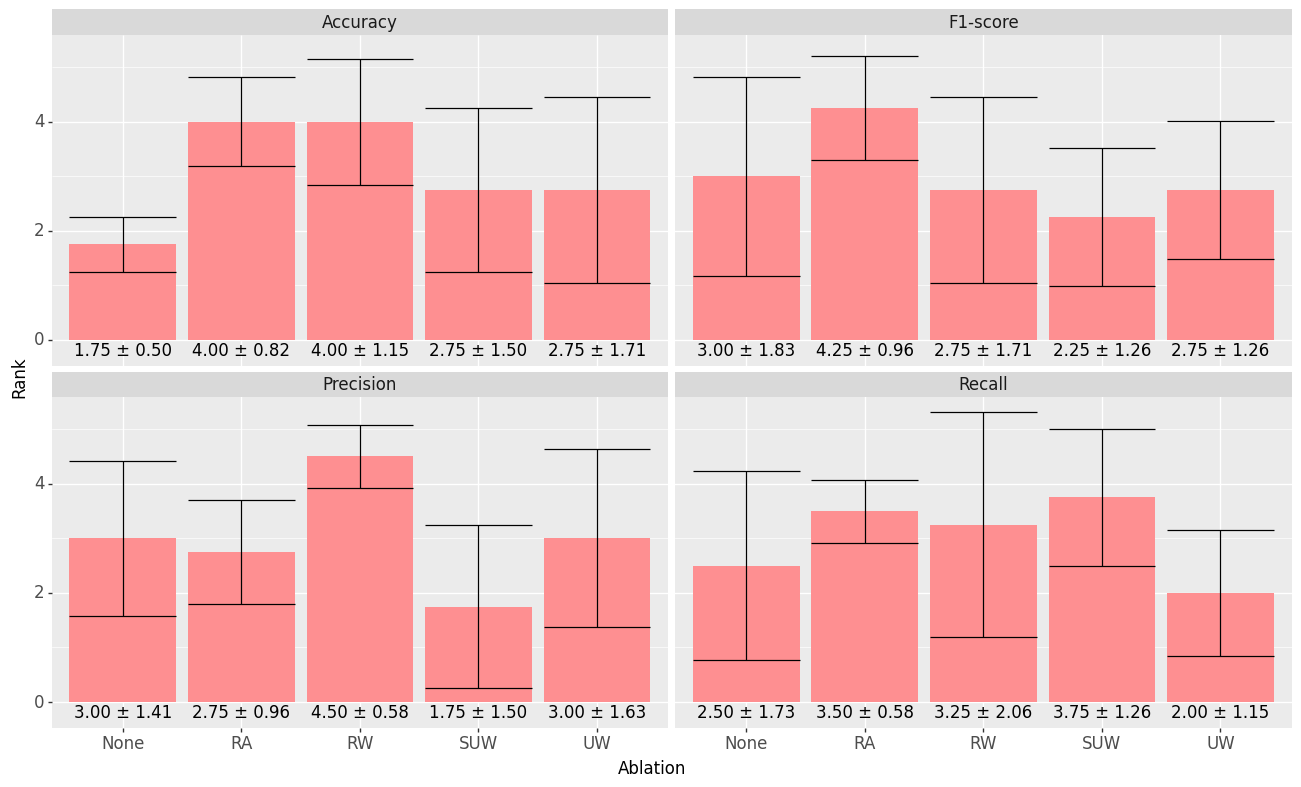

<ggplot: (817016667)>

In [23]:
p9.ggplot(best_results_df_grouped[best_results_df_grouped['split'] == 'Testing'],
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.2, label = 'label'), position = p9.position_dodge2(width = .9), size = 12) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Ablation') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Graph neural network') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

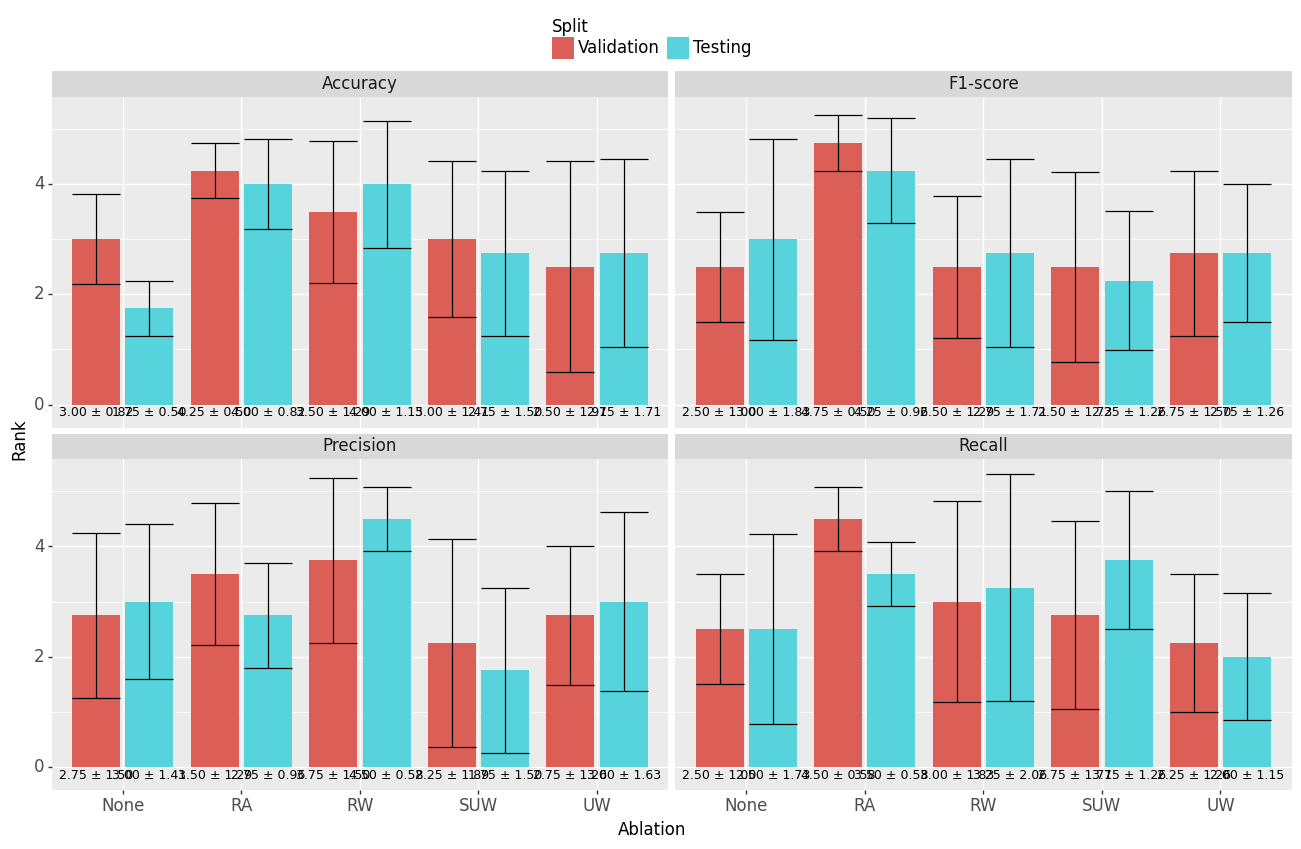

<ggplot: (816704666)>

In [24]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean', fill = 'split')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.15, label = 'label'), position = p9.position_dodge2(width = .9), size = 9) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Ablation') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Split') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

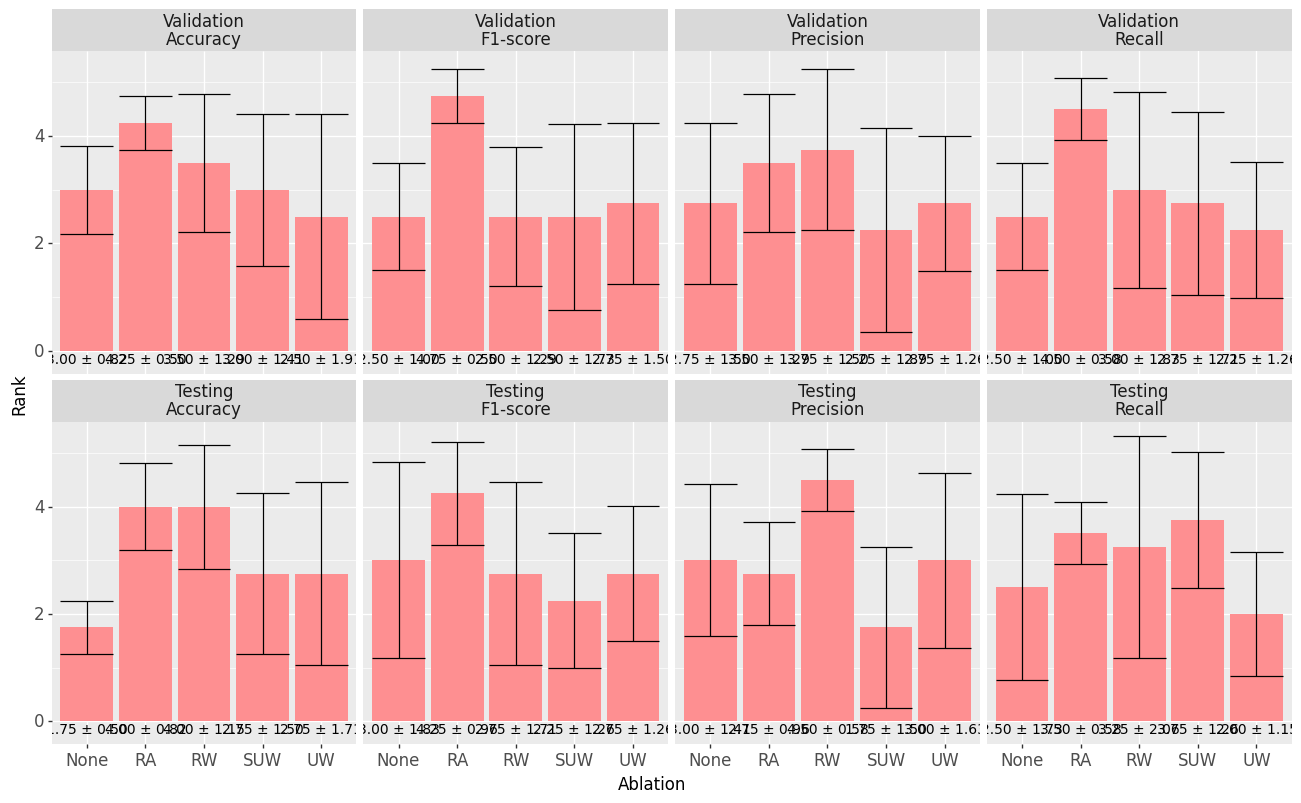

<ggplot: (816186936)>

In [25]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.15, label = 'label'), position = p9.position_dodge2(width = .9), size = 10) + \
  p9.facet_wrap('~split+metric', ncol = 4) + \
  p9.xlab('Ablation') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

## Percentage change analysis

In [26]:
best_results_df.drop(columns = [x for x in best_results_df.columns if x.endswith('_rank')], inplace = True)

In [27]:
best_results_df.head()

,dataset,target_metric,gnn,llm,method,aggregation,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,validation_accuracy_mean,...,validation_recall_mean,validation_recall_std,test_accuracy_mean,test_accuracy_std,test_f1_score_mean,test_f1_score_std,test_precision_mean,test_precision_std,test_recall_mean,test_recall_std
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.901376,...,0.901516,0.004972,0.891763,0.007629,0.891736,0.007623,0.892126,0.007726,0.891752,0.007622
1,R8,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.976481,...,0.959057,0.006823,0.976336,0.003250,0.939839,0.005253,0.939268,0.008384,0.942734,0.005832
2,Ohsumed,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.706696,...,0.625109,0.017253,0.701756,0.008327,0.608625,0.011556,0.627336,0.009202,0.604572,0.011657
3,IMDb-top_1000,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,No_Ablation,0.0,0.0,0.912121,...,0.912175,0.009324,0.923582,0.004494,0.923385,0.004462,0.923289,0.004310,0.924579,0.004193
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,Random_Attentions,0.0,0.0,0.901376,...,0.901368,0.005604,0.891049,0.007579,0.891017,0.007585,0.891524,0.007507,0.891058,0.007564


In [28]:
#best_results_df['is_base'] = (best_results_df['gnn'] == 'GATv2') & (best_results_df['method'] == 'Grouped') & (best_results_df['aggregation'] == 'No_Aggregation') & (best_results_df['llm'] == 'FacebookAI-roberta-large')
best_results_df['is_base'] = (best_results_df['gnn'] == 'GATv2') & (best_results_df['method'] == 'Surrogate') & (best_results_df['aggregation'] == 'No_Aggregation') & (best_results_df['llm'] == 'google-bert-bert-base-uncased') & (best_results_df['ablation_operation'] == 'No_Ablation')

In [29]:
for column in [x for x in best_results_df.columns if x.endswith('_mean')]:
  best_results_df[f'{column}_change'] = best_results_df[['dataset', column, 'is_base']] \
    .groupby(['dataset']) \
    .apply(
      lambda group: group.apply(
        lambda row: ((row[column] - group.loc[group['is_base'], column].values[0]) / group.loc[group['is_base'], column].values[0]) * 100
          if group['is_base'].any() else None, axis = 1
        )
    ).reset_index(drop = True)

In [30]:
best_results_df = best_results_df[~best_results_df['is_base']]

In [31]:
best_results_df.head()

,dataset,target_metric,gnn,llm,method,aggregation,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,validation_accuracy_mean,...,test_recall_std,is_base,validation_accuracy_mean_change,validation_f1_score_mean_change,validation_precision_mean_change,validation_recall_mean_change,test_accuracy_mean_change,test_f1_score_mean_change,test_precision_mean_change,test_recall_mean_change
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,Random_Attentions,0.0,0.0,0.901376,...,0.007564,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,Random_Weights,0.0,0.0,0.903440,...,0.005769,False,-0.398671,-0.364870,-0.257238,-0.097882,-1.777634,-1.758275,-1.108444,-1.363199
2,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,Unitary_Weights,0.0,0.0,0.903670,...,0.004240,False,-0.265781,-0.268640,-0.336862,-0.302545,-1.680672,-1.666722,-1.507814,-1.495278
3,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,Single_Unitary_Weight,0.0,0.0,0.901147,...,0.006084,False,0.000000,0.016035,-0.056255,0.097882,0.420168,0.422336,0.406579,0.423930
4,R8,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,Random_Attentions,0.0,0.0,0.975479,...,0.010422,False,0.000000,0.026976,0.027856,0.204663,-1.745314,-1.728361,-1.275296,-1.422073


In [32]:
best_results_df_melted = best_results_df.drop(columns = ['dataset', 'target_metric', 'gnn', 'aggregation', 'llm', 'node_ablation_noise_level', 'node_ablation_feature_noise_level']).melt(id_vars = ['ablation_operation', 'method'], var_name = 'information', value_name = 'value')
split_information_column = best_results_df_melted['information'].str.split('_')
best_results_df_melted['split'] = split_information_column.str[0]
best_results_df_melted['metric'] = split_information_column.str[1]
best_results_df_melted.drop(columns = ['information'], inplace = True)

In [33]:
best_results_df_melted

,ablation_operation,method,value,split,metric
0,Random_Attentions,Surrogate,0.901376,validation,accuracy
1,Random_Weights,Surrogate,0.90344,validation,accuracy
2,Unitary_Weights,Surrogate,0.90367,validation,accuracy
3,Single_Unitary_Weight,Surrogate,0.901147,validation,accuracy
4,Random_Attentions,Surrogate,0.975479,validation,accuracy
...,...,...,...,...,...
395,Single_Unitary_Weight,Surrogate,-0.279527,test,recall
396,Random_Attentions,Surrogate,0.495576,test,recall
397,Random_Weights,Surrogate,-0.253482,test,recall
398,Unitary_Weights,Surrogate,-0.579971,test,recall


In [34]:
best_results_df_melted['metric'] = best_results_df_melted['metric'].replace({'f1' : 'F1-score'}).str.capitalize()
best_results_df_melted['method'] = best_results_df_melted['method'].replace({
  'Grouped' : 'G',
  'Surrogate' : 'S'
})
best_results_df_melted['ablation_operation'] = best_results_df_melted['ablation_operation'].replace({
  'No_Ablation' : 'None',
  'Random_Attentions' : 'RA',
  'Random_Weights' : 'RW',
  'Unitary_Weights' : 'UW',
  'Single_Unitary_Weight' : 'SUW'
})
best_results_df_melted['split'] = best_results_df_melted['split'].replace({'test' : 'Testing'}).str.capitalize()
best_results_df_melted['split'] = pd.Categorical(best_results_df_melted['split'], categories = ['Validation', 'Testing'])

In [35]:
best_results_df_melted['value'] = best_results_df_melted['value'].astype(float)

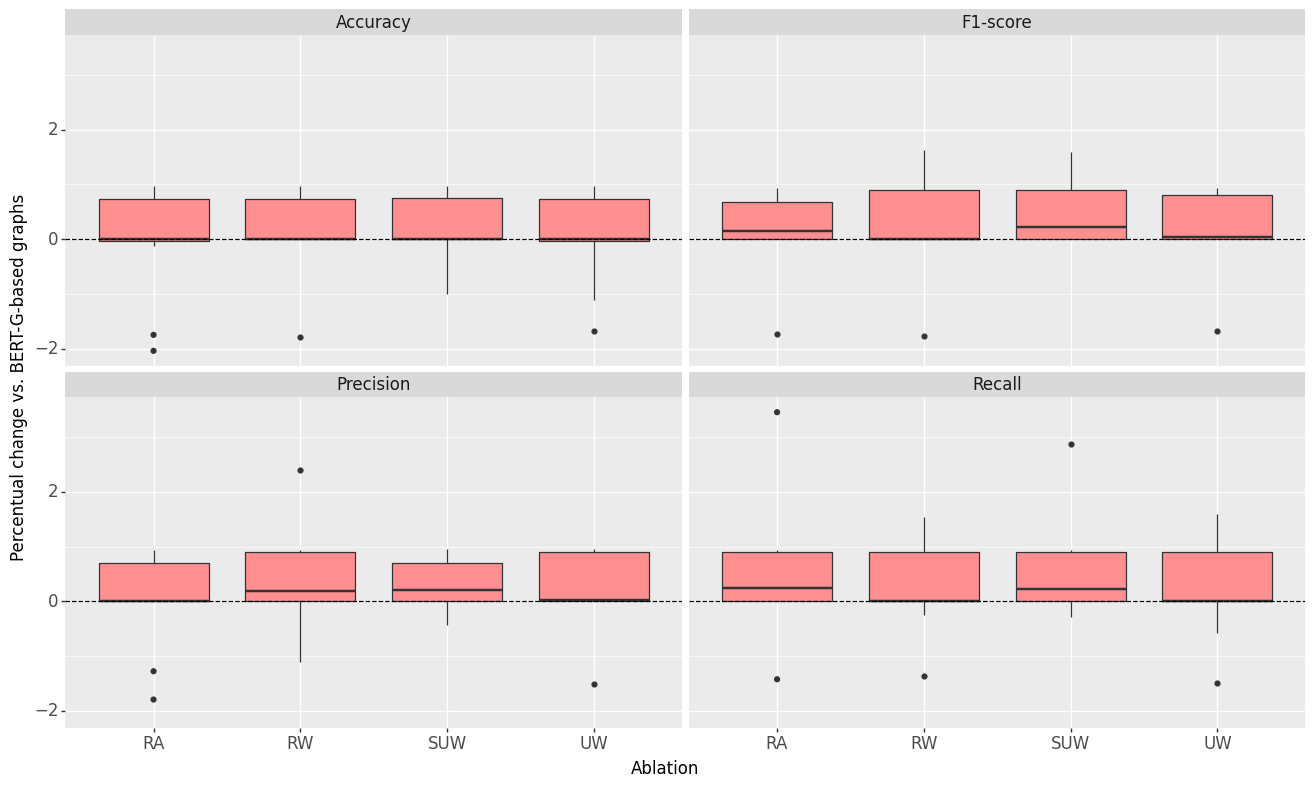

<ggplot: (816870596)>

In [37]:
p9.ggplot(best_results_df_melted[best_results_df_melted['split'] == 'Testing'],
  p9.aes(x = 'ablation_operation', y = 'value', group = 'ablation_operation')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Ablation') + \
  p9.ylab('Percentual change vs. BERT-G-based graphs') + \
  p9.labs(fill = 'Graph neural network') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

In [38]:
best_results_df_grouped = best_results_df.groupby(['ablation_operation', 'method']).agg({
  'validation_accuracy_mean_change' : ['mean', 'std'],
  'test_accuracy_mean_change' : ['mean', 'std'],
  'validation_f1_score_mean_change' : ['mean', 'std'],
  'test_f1_score_mean_change' : ['mean', 'std'],
  'validation_precision_mean_change' : ['mean', 'std'],
  'test_precision_mean_change' : ['mean', 'std'],
  'validation_recall_mean_change' : ['mean', 'std'],
  'test_recall_mean_change' : ['mean', 'std'],
}).reset_index()
best_results_df_grouped.columns = best_results_df_grouped.columns.map('_'.join).str.strip('_')

In [39]:
best_results_df_grouped = best_results_df_grouped.melt(id_vars = ['ablation_operation', 'method'], var_name = 'information', value_name = 'value')
split_information_column = best_results_df_grouped['information'].str.split('_')
best_results_df_grouped['split'] = split_information_column.str[0]
best_results_df_grouped['metric'] = split_information_column.str[1]
best_results_df_grouped['mean_std'] = split_information_column.str[-1]
best_results_df_grouped.drop(columns = ['information'], inplace = True)

In [40]:
best_results_df_grouped = best_results_df_grouped.pivot_table(index = ['ablation_operation', 'method', 'split', 'metric'], columns = 'mean_std', values = 'value').reset_index()

In [41]:
best_results_df_grouped['label'] = best_results_df_grouped['mean'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + best_results_df_grouped['std'].map(lambda x : '{:.2f}'.format(x))

In [42]:
best_results_df_grouped.head()

mean_std,ablation_operation,method,split,metric,mean,std,label
0,Random_Attentions,Surrogate,test,accuracy,-0.976047,1.064662,-0.98 ± 1.06
1,Random_Attentions,Surrogate,test,f1,-0.279734,0.976575,-0.28 ± 0.98
2,Random_Attentions,Surrogate,test,precision,-0.746041,0.934226,-0.75 ± 0.93
3,Random_Attentions,Surrogate,test,recall,0.631938,2.049581,0.63 ± 2.05
4,Random_Attentions,Surrogate,validation,accuracy,-1.079666,2.060958,-1.08 ± 2.06


In [43]:
best_results_df_grouped['metric'] = best_results_df_grouped['metric'].replace({'f1' : 'F1-score'}).str.capitalize()
best_results_df_grouped['ablation_operation'] = best_results_df_grouped['ablation_operation'].replace({
  'No_Ablation' : 'None',
  'Random_Attentions' : 'RA',
  'Random_Weights' : 'RW',
  'Unitary_Weights' : 'UW',
  'Single_Unitary_Weight' : 'SUW'
})
best_results_df_grouped['method'] = best_results_df_grouped['method'].replace({
  'Grouped' : 'G',
  'Surrogate' : 'S'
})

In [44]:
best_results_df_grouped['split'] = best_results_df_grouped['split'].replace({'test' : 'Testing'}).str.capitalize()
best_results_df_grouped['split'] = pd.Categorical(best_results_df_grouped['split'], categories = ['Validation', 'Testing'])

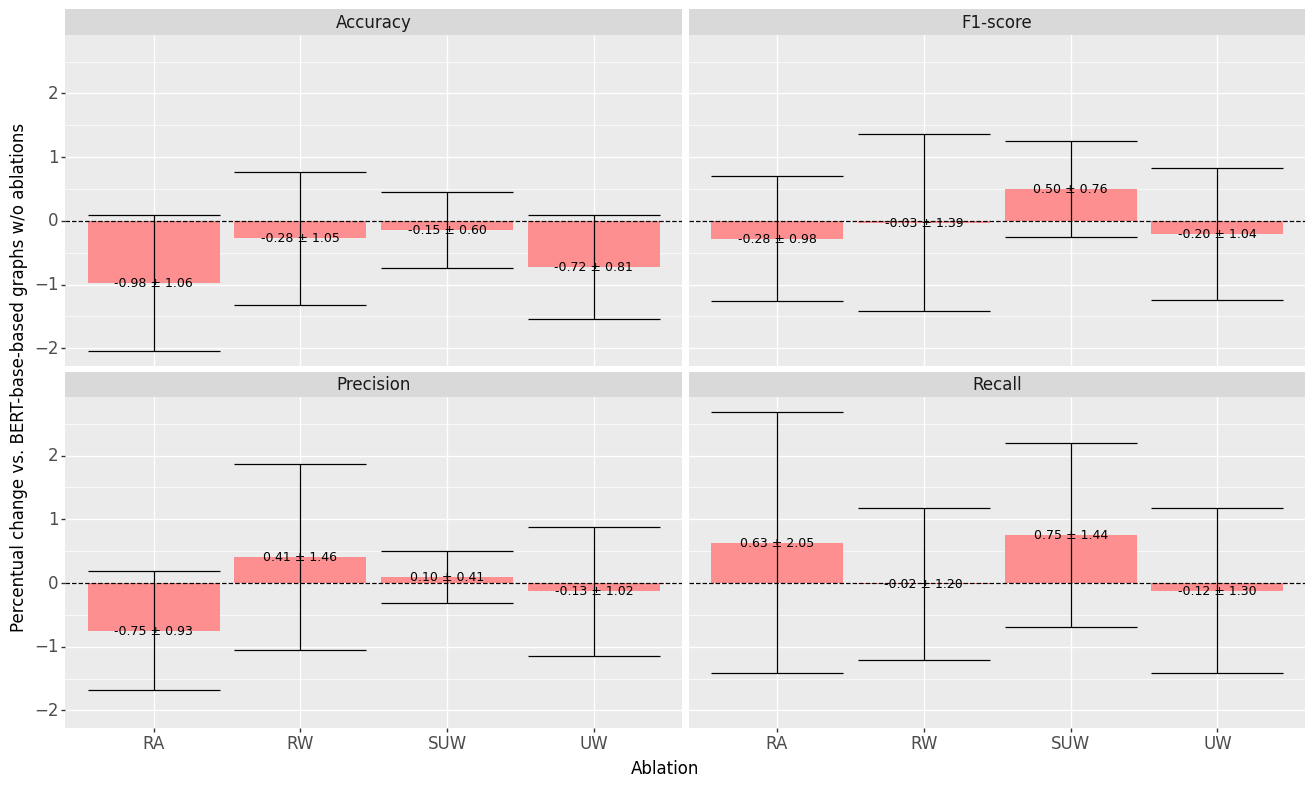

<ggplot: (817088065)>

In [45]:
p9.ggplot(best_results_df_grouped[best_results_df_grouped['split'] == 'Testing'],
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(label = 'label'), position = p9.position_dodge2(width = .9), size = 9) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Ablation') + \
  p9.ylab('Percentual change vs. BERT-base-based graphs w/o ablations') + \
  p9.labs(fill = 'Split') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

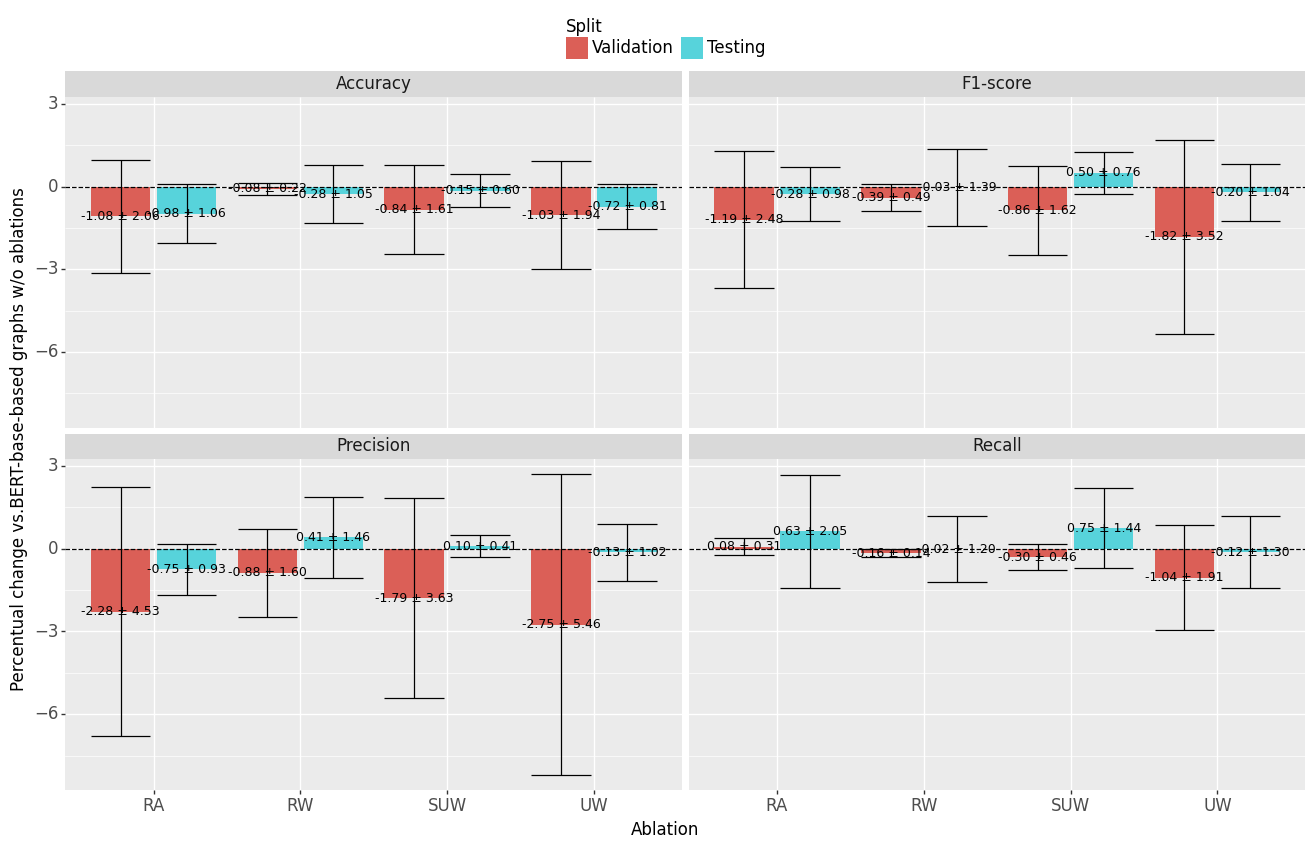

<ggplot: (815922210)>

In [46]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean', fill = 'split')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(label = 'label'), position = p9.position_dodge2(width = .9), size = 9) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Ablation') + \
  p9.ylab('Percentual change vs.BERT-base-based graphs w/o ablations') + \
  p9.labs(fill = 'Split') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

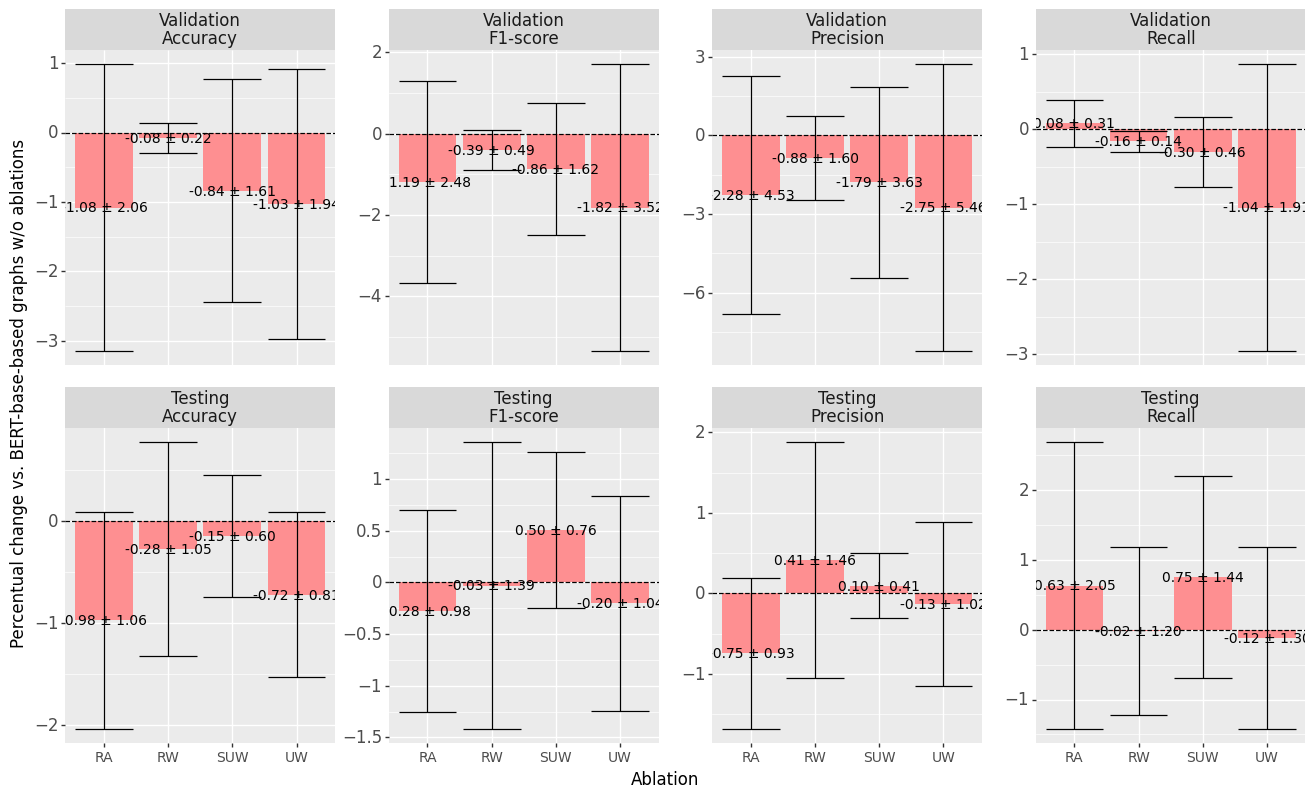

<ggplot: (815933350)>

In [47]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(label = 'label'), position = p9.position_dodge2(width = .9), size = 10) + \
  p9.facet_wrap('~split+metric', ncol = 4, scales = 'free_y') + \
  p9.xlab('Ablation') + \
  p9.ylab('Percentual change vs. BERT-base-based graphs w/o ablations') + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12),
    axis_text_x = p9.element_text(size = 10),
    subplots_adjust = {
      'hspace': 0.2,
      'wspace': 0.2
    }
  )

### Nodes

In [66]:
best_results_df = pd.concat([
  get_best_results_for_plot(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation']
  ),
  get_best_results_for_plot_ablations(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation'],
    ablation_operations = ['No_Ablation'],
    node_ablation_noise_levels = [1.0],
    node_ablation_feature_noise_levels = [0.25, 0.5, 0.75],
  )
])

In [68]:
best_results_df['ablation_operation'] = best_results_df['node_ablation_feature_noise_level'].map(lambda x : f'{int(x * 100)}%')

## Rank analysis

In [70]:
for column in [x for x in best_results_df.columns if x.endswith('_mean')]:
  best_results_df[f'{column}_rank'] = best_results_df[['dataset', 'method', column]].groupby(['dataset', 'method']).rank(method = 'max', ascending = False)

In [71]:
best_results_df.head()

,dataset,target_metric,gnn,llm,method,aggregation,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,validation_accuracy_mean,...,test_recall_mean,test_recall_std,validation_accuracy_mean_rank,validation_f1_score_mean_rank,validation_precision_mean_rank,validation_recall_mean_rank,test_accuracy_mean_rank,test_f1_score_mean_rank,test_precision_mean_rank,test_recall_mean_rank
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.901376,...,0.891752,0.007622,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,R8,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.976481,...,0.942734,0.005832,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Ohsumed,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.706696,...,0.604572,0.011657,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,IMDb-top_1000,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.912121,...,0.924579,0.004193,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,25%,1.0,0.25,0.883945,...,0.873018,0.006180,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [72]:
best_results_df_grouped = best_results_df.groupby(['method', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level']).agg({
  'validation_accuracy_mean_rank' : ['mean', 'std'],
  'test_accuracy_mean_rank' : ['mean', 'std'],
  'validation_f1_score_mean_rank' : ['mean', 'std'],
  'test_f1_score_mean_rank' : ['mean', 'std'],
  'validation_precision_mean_rank' : ['mean', 'std'],
  'test_precision_mean_rank' : ['mean', 'std'],
  'validation_recall_mean_rank' : ['mean', 'std'],
  'test_recall_mean_rank' : ['mean', 'std'],
}).reset_index()
best_results_df_grouped.columns = best_results_df_grouped.columns.map('_'.join).str.strip('_')

In [73]:
best_results_df_grouped = best_results_df_grouped.melt(id_vars = ['method', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level'], var_name = 'information', value_name = 'value') # .drop(columns = ['gnn', 'method'])
split_information_column = best_results_df_grouped['information'].str.split('_')
best_results_df_grouped['split'] = split_information_column.str[0]
best_results_df_grouped['metric'] = split_information_column.str[1]
best_results_df_grouped['mean_std'] = split_information_column.str[-1]
best_results_df_grouped.drop(columns = ['information'], inplace = True)

In [74]:
best_results_df_grouped = best_results_df_grouped.pivot_table(index = ['method', 'ablation_operation', 'node_ablation_noise_level', 'node_ablation_feature_noise_level', 'split', 'metric'], columns = 'mean_std', values = 'value').reset_index()

In [75]:
best_results_df_grouped['label'] = best_results_df_grouped['mean'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + best_results_df_grouped['std'].map(lambda x : '{:.2f}'.format(x))

In [76]:
best_results_df_grouped.head()

mean_std,method,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,split,metric,mean,std,label
0,Surrogate,0%,0.0,0.0,test,accuracy,1.0,0.0,1.00 ± 0.00
1,Surrogate,0%,0.0,0.0,test,f1,1.0,0.0,1.00 ± 0.00
2,Surrogate,0%,0.0,0.0,test,precision,1.0,0.0,1.00 ± 0.00
3,Surrogate,0%,0.0,0.0,test,recall,1.0,0.0,1.00 ± 0.00
4,Surrogate,0%,0.0,0.0,validation,accuracy,1.0,0.0,1.00 ± 0.00


In [77]:
best_results_df_grouped['metric'] = best_results_df_grouped['metric'].replace({'f1' : 'F1-score'}).str.capitalize()

In [78]:
best_results_df_grouped['method'] = best_results_df_grouped['method'].replace({
  'Grouped' : 'G',
  'Surrogate' : 'S'
})

In [79]:
best_results_df_grouped['split'] = best_results_df_grouped['split'].replace({'test' : 'Testing'}).str.capitalize()
best_results_df_grouped['split'] = pd.Categorical(best_results_df_grouped['split'], categories = ['Validation', 'Testing'])

In [80]:
best_results_df_grouped.head()

mean_std,method,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,split,metric,mean,std,label
0,S,0%,0.0,0.0,Testing,Accuracy,1.0,0.0,1.00 ± 0.00
1,S,0%,0.0,0.0,Testing,F1-score,1.0,0.0,1.00 ± 0.00
2,S,0%,0.0,0.0,Testing,Precision,1.0,0.0,1.00 ± 0.00
3,S,0%,0.0,0.0,Testing,Recall,1.0,0.0,1.00 ± 0.00
4,S,0%,0.0,0.0,Validation,Accuracy,1.0,0.0,1.00 ± 0.00


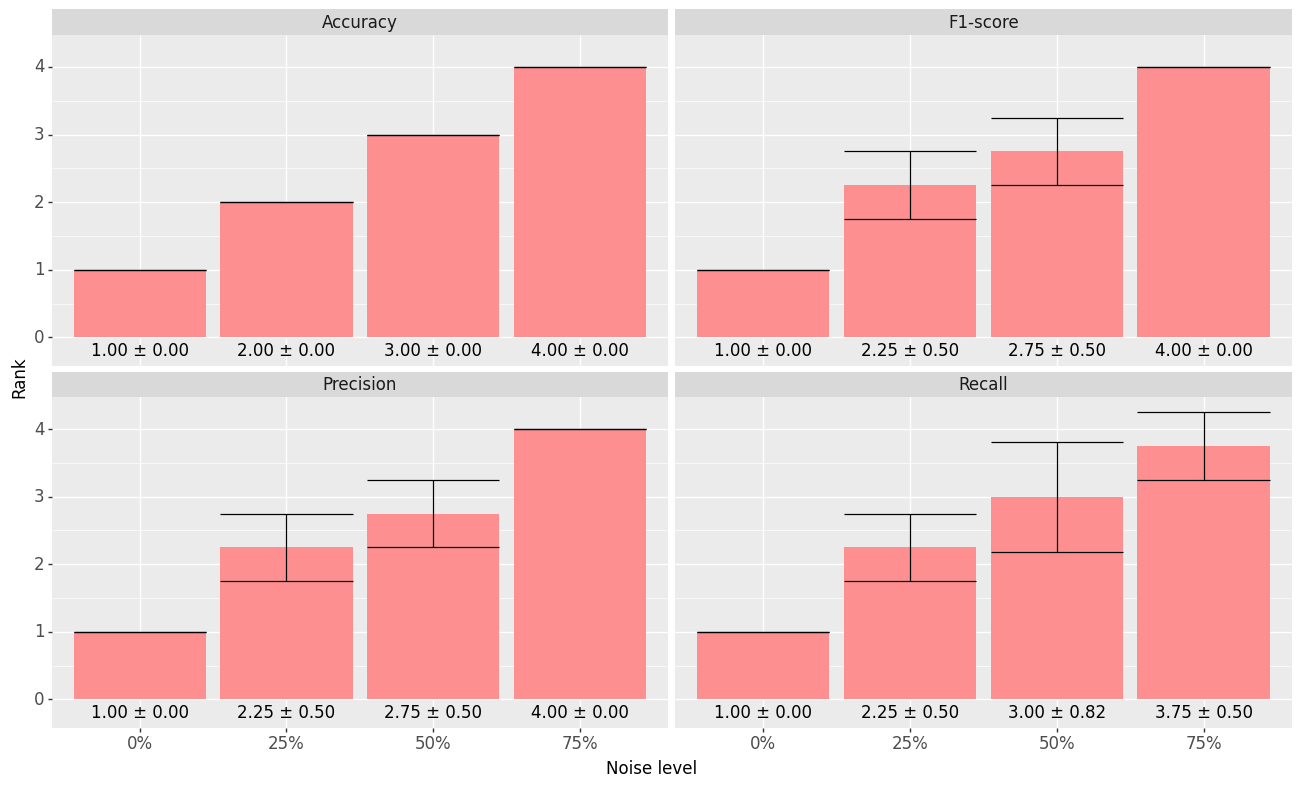

<ggplot: (819679338)>

In [82]:
p9.ggplot(best_results_df_grouped[best_results_df_grouped['split'] == 'Testing'],
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.2, label = 'label'), position = p9.position_dodge2(width = .9), size = 12) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Noise level') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Graph neural network') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

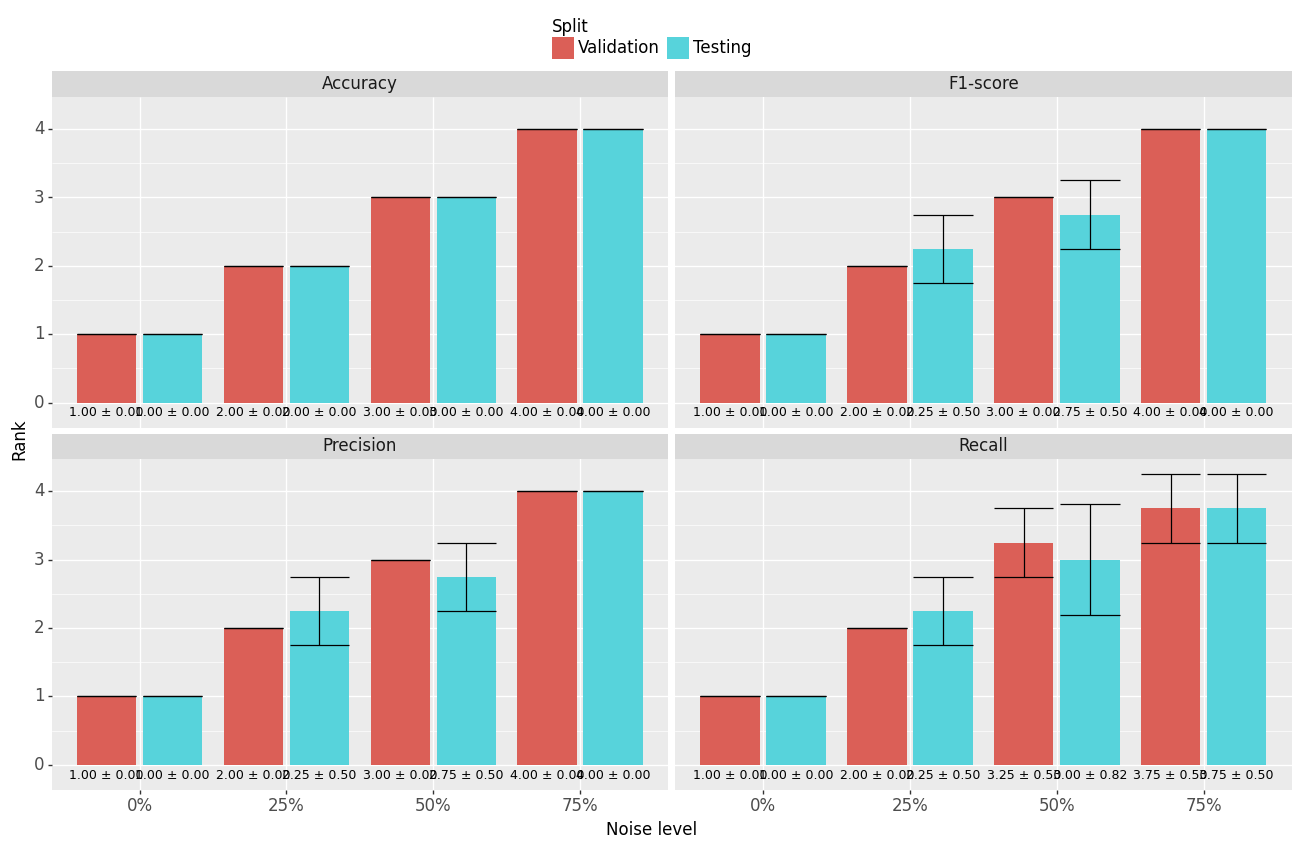

<ggplot: (816516649)>

In [83]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean', fill = 'split')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.15, label = 'label'), position = p9.position_dodge2(width = .9), size = 9) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Noise level') + \
  p9.ylab('Rank') + \
  p9.labs(fill = 'Split') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

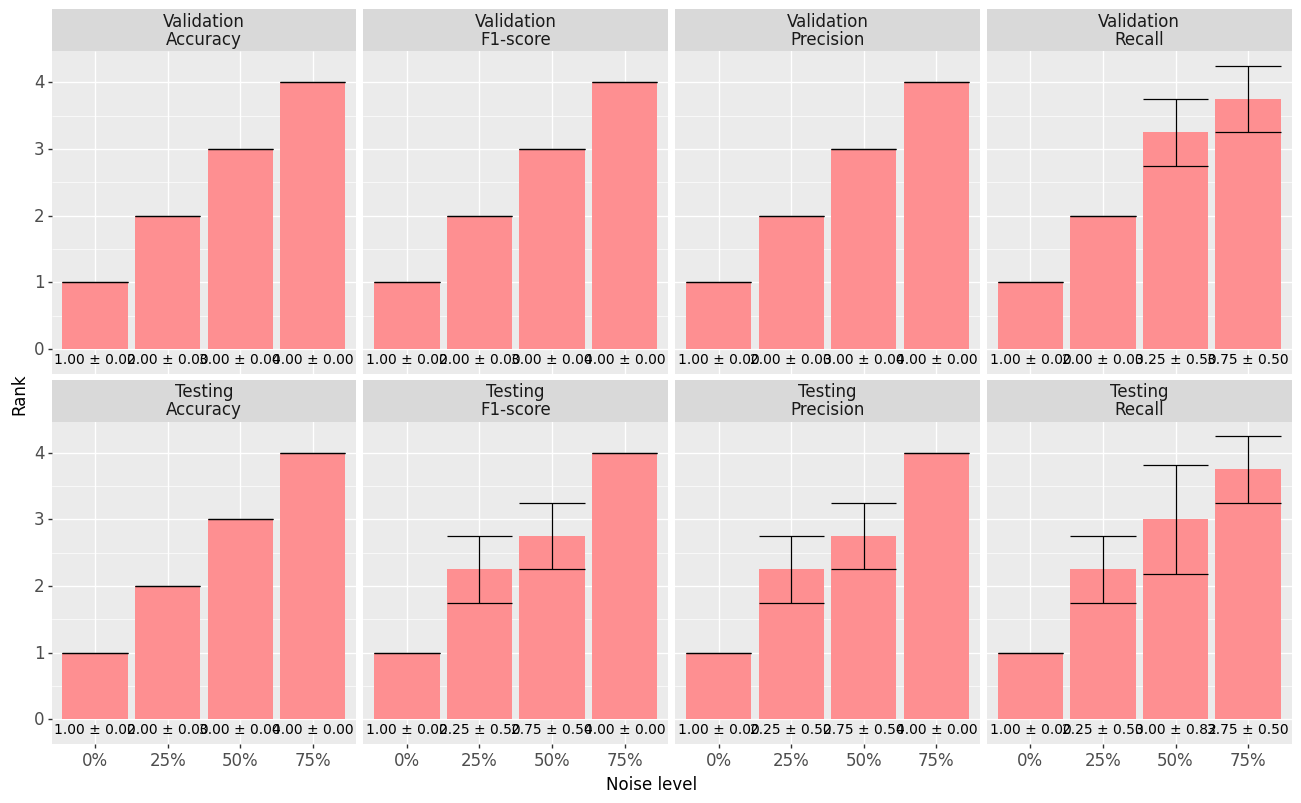

<ggplot: (819621237)>

In [84]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.15, label = 'label'), position = p9.position_dodge2(width = .9), size = 10) + \
  p9.facet_wrap('~split+metric', ncol = 4) + \
  p9.xlab('Noise level') + \
  p9.ylab('Rank') + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

## Percentage change analysis

In [85]:
best_results_df.drop(columns = [x for x in best_results_df.columns if x.endswith('_rank')], inplace = True)

In [86]:
best_results_df.head()

,dataset,target_metric,gnn,llm,method,aggregation,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,validation_accuracy_mean,...,validation_recall_mean,validation_recall_std,test_accuracy_mean,test_accuracy_std,test_f1_score_mean,test_f1_score_std,test_precision_mean,test_precision_std,test_recall_mean,test_recall_std
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.901376,...,0.901516,0.004972,0.891763,0.007629,0.891736,0.007623,0.892126,0.007726,0.891752,0.007622
1,R8,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.976481,...,0.959057,0.006823,0.976336,0.003250,0.939839,0.005253,0.939268,0.008384,0.942734,0.005832
2,Ohsumed,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.706696,...,0.625109,0.017253,0.701756,0.008327,0.608625,0.011556,0.627336,0.009202,0.604572,0.011657
3,IMDb-top_1000,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,0%,0.0,0.00,0.912121,...,0.912175,0.009324,0.923582,0.004494,0.923385,0.004462,0.923289,0.004310,0.924579,0.004193
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,25%,1.0,0.25,0.883945,...,0.884116,0.005206,0.873037,0.006212,0.872939,0.006172,0.874170,0.006803,0.873018,0.006180


In [87]:
#best_results_df['is_base'] = (best_results_df['gnn'] == 'GATv2') & (best_results_df['method'] == 'Grouped') & (best_results_df['aggregation'] == 'No_Aggregation') & (best_results_df['llm'] == 'FacebookAI-roberta-large')
best_results_df['is_base'] = (best_results_df['gnn'] == 'GATv2') & (best_results_df['method'] == 'Surrogate') & (best_results_df['aggregation'] == 'No_Aggregation') & (best_results_df['llm'] == 'google-bert-bert-base-uncased') & (best_results_df['ablation_operation'] == '0%')

In [88]:
for column in [x for x in best_results_df.columns if x.endswith('_mean')]:
  best_results_df[f'{column}_change'] = best_results_df[['dataset', column, 'is_base']] \
    .groupby(['dataset']) \
    .apply(
      lambda group: group.apply(
        lambda row: ((row[column] - group.loc[group['is_base'], column].values[0]) / group.loc[group['is_base'], column].values[0]) * 100
          if group['is_base'].any() else None, axis = 1
        )
    ).reset_index(drop = True)

In [89]:
best_results_df = best_results_df[~best_results_df['is_base']]

In [90]:
best_results_df.head()

,dataset,target_metric,gnn,llm,method,aggregation,ablation_operation,node_ablation_noise_level,node_ablation_feature_noise_level,validation_accuracy_mean,...,test_recall_std,is_base,validation_accuracy_mean_change,validation_f1_score_mean_change,validation_precision_mean_change,validation_recall_mean_change,test_accuracy_mean_change,test_f1_score_mean_change,test_precision_mean_change,test_recall_mean_change
0,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,25%,1.0,0.25,0.883945,...,0.006180,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,50%,1.0,0.50,0.864564,...,0.005700,False,-3.920266,-3.895985,-3.809644,-3.675031,-3.038138,-3.020882,-2.542307,-2.701802
2,SST-2,accuracy,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,75%,1.0,0.75,0.860092,...,0.004728,False,-4.318937,-4.310400,-4.168039,-4.128849,-3.619910,-3.610702,-3.126464,-3.325787
3,R8,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,25%,1.0,0.25,0.967821,...,0.009019,False,-4.584718,-4.601686,-4.498608,-4.547072,-4.298643,-4.299695,-3.875093,-4.076040
4,R8,f1_score,GATv2,google-bert-bert-base-uncased,Surrogate,No_Aggregation,50%,1.0,0.50,0.960711,...,0.015249,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
best_results_df_melted = best_results_df.drop(columns = ['dataset', 'target_metric', 'gnn', 'aggregation', 'llm', 'node_ablation_noise_level', 'node_ablation_feature_noise_level']).melt(id_vars = ['ablation_operation', 'method'], var_name = 'information', value_name = 'value')
split_information_column = best_results_df_melted['information'].str.split('_')
best_results_df_melted['split'] = split_information_column.str[0]
best_results_df_melted['metric'] = split_information_column.str[1]
best_results_df_melted.drop(columns = ['information'], inplace = True)

In [92]:
best_results_df_melted

,ablation_operation,method,value,split,metric
0,25%,Surrogate,0.883945,validation,accuracy
1,50%,Surrogate,0.864564,validation,accuracy
2,75%,Surrogate,0.860092,validation,accuracy
3,25%,Surrogate,0.967821,validation,accuracy
4,50%,Surrogate,0.960711,validation,accuracy
...,...,...,...,...,...
295,50%,Surrogate,-10.389606,test,recall
296,75%,Surrogate,0.0,test,recall
297,25%,Surrogate,-2.491899,test,recall
298,50%,Surrogate,-2.072083,test,recall


In [93]:
best_results_df_melted['metric'] = best_results_df_melted['metric'].replace({'f1' : 'F1-score'}).str.capitalize()
best_results_df_melted['method'] = best_results_df_melted['method'].replace({
  'Grouped' : 'G',
  'Surrogate' : 'S'
})
best_results_df_melted['split'] = best_results_df_melted['split'].replace({'test' : 'Testing'}).str.capitalize()
best_results_df_melted['split'] = pd.Categorical(best_results_df_melted['split'], categories = ['Validation', 'Testing'])

In [94]:
best_results_df_melted['value'] = best_results_df_melted['value'].astype(float)

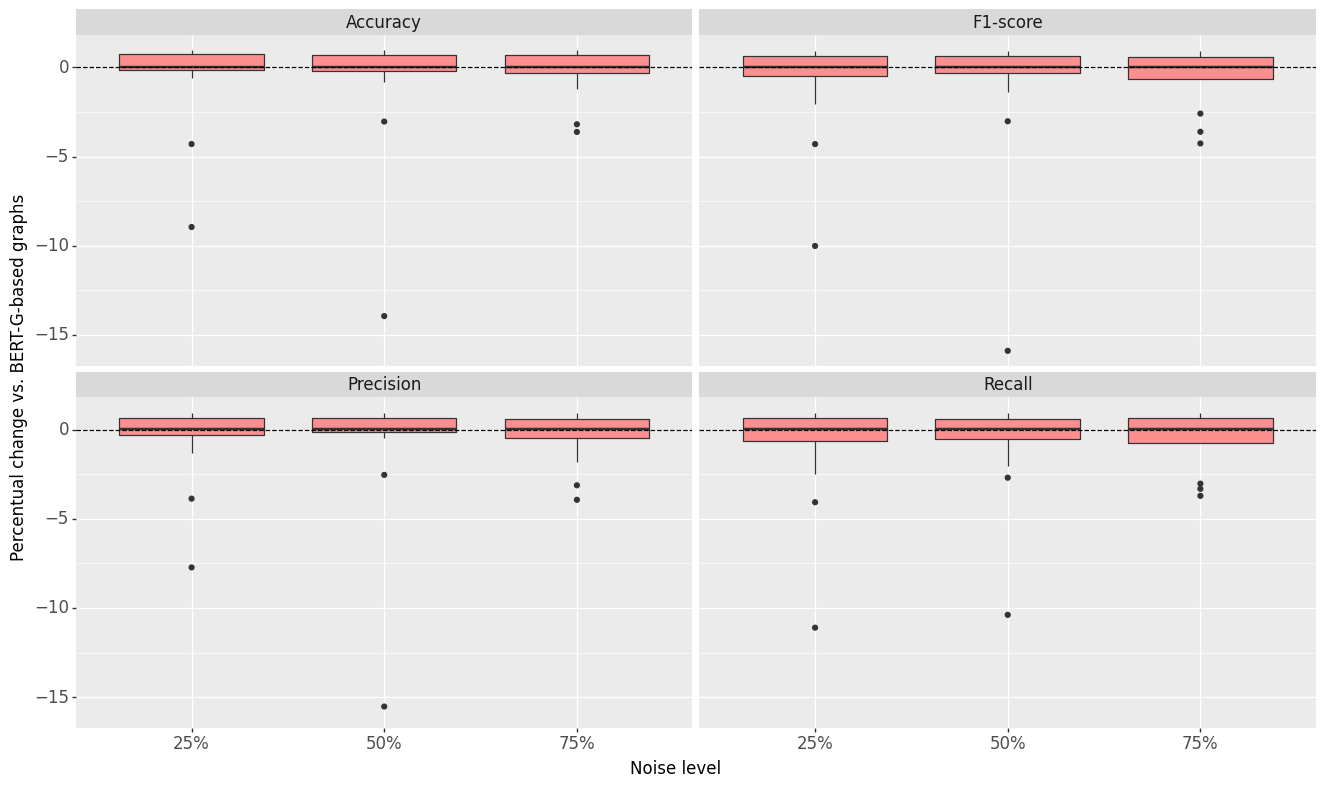

<ggplot: (817883479)>

In [95]:
p9.ggplot(best_results_df_melted[best_results_df_melted['split'] == 'Testing'],
  p9.aes(x = 'ablation_operation', y = 'value', group = 'ablation_operation')) + \
  p9.theme_gray() + \
  p9.geom_boxplot(fill = '#fe8f91') + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Noise level') + \
  p9.ylab('Percentual change vs. BERT-G-based graphs') + \
  p9.labs(fill = 'Graph neural network') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

In [96]:
best_results_df_grouped = best_results_df.groupby(['ablation_operation', 'method']).agg({
  'validation_accuracy_mean_change' : ['mean', 'std'],
  'test_accuracy_mean_change' : ['mean', 'std'],
  'validation_f1_score_mean_change' : ['mean', 'std'],
  'test_f1_score_mean_change' : ['mean', 'std'],
  'validation_precision_mean_change' : ['mean', 'std'],
  'test_precision_mean_change' : ['mean', 'std'],
  'validation_recall_mean_change' : ['mean', 'std'],
  'test_recall_mean_change' : ['mean', 'std'],
}).reset_index()
best_results_df_grouped.columns = best_results_df_grouped.columns.map('_'.join).str.strip('_')

In [97]:
best_results_df_grouped = best_results_df_grouped.melt(id_vars = ['ablation_operation', 'method'], var_name = 'information', value_name = 'value')
split_information_column = best_results_df_grouped['information'].str.split('_')
best_results_df_grouped['split'] = split_information_column.str[0]
best_results_df_grouped['metric'] = split_information_column.str[1]
best_results_df_grouped['mean_std'] = split_information_column.str[-1]
best_results_df_grouped.drop(columns = ['information'], inplace = True)

In [98]:
best_results_df_grouped = best_results_df_grouped.pivot_table(index = ['ablation_operation', 'method', 'split', 'metric'], columns = 'mean_std', values = 'value').reset_index()

In [99]:
best_results_df_grouped['label'] = best_results_df_grouped['mean'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + best_results_df_grouped['std'].map(lambda x : '{:.2f}'.format(x))

In [100]:
best_results_df_grouped.head()

mean_std,ablation_operation,method,split,metric,mean,std,label
0,25%,Surrogate,test,accuracy,-3.460460,4.123762,-3.46 ± 4.12
1,25%,Surrogate,test,f1,-4.087371,4.322917,-4.09 ± 4.32
2,25%,Surrogate,test,precision,-3.230790,3.404102,-3.23 ± 3.40
3,25%,Surrogate,test,recall,-4.418938,4.764421,-4.42 ± 4.76
4,25%,Surrogate,validation,accuracy,-3.910534,4.621594,-3.91 ± 4.62


In [101]:
best_results_df_grouped['metric'] = best_results_df_grouped['metric'].replace({'f1' : 'F1-score'}).str.capitalize()
best_results_df_grouped['method'] = best_results_df_grouped['method'].replace({
  'Grouped' : 'G',
  'Surrogate' : 'S'
})

In [102]:
best_results_df_grouped['split'] = best_results_df_grouped['split'].replace({'test' : 'Testing'}).str.capitalize()
best_results_df_grouped['split'] = pd.Categorical(best_results_df_grouped['split'], categories = ['Validation', 'Testing'])

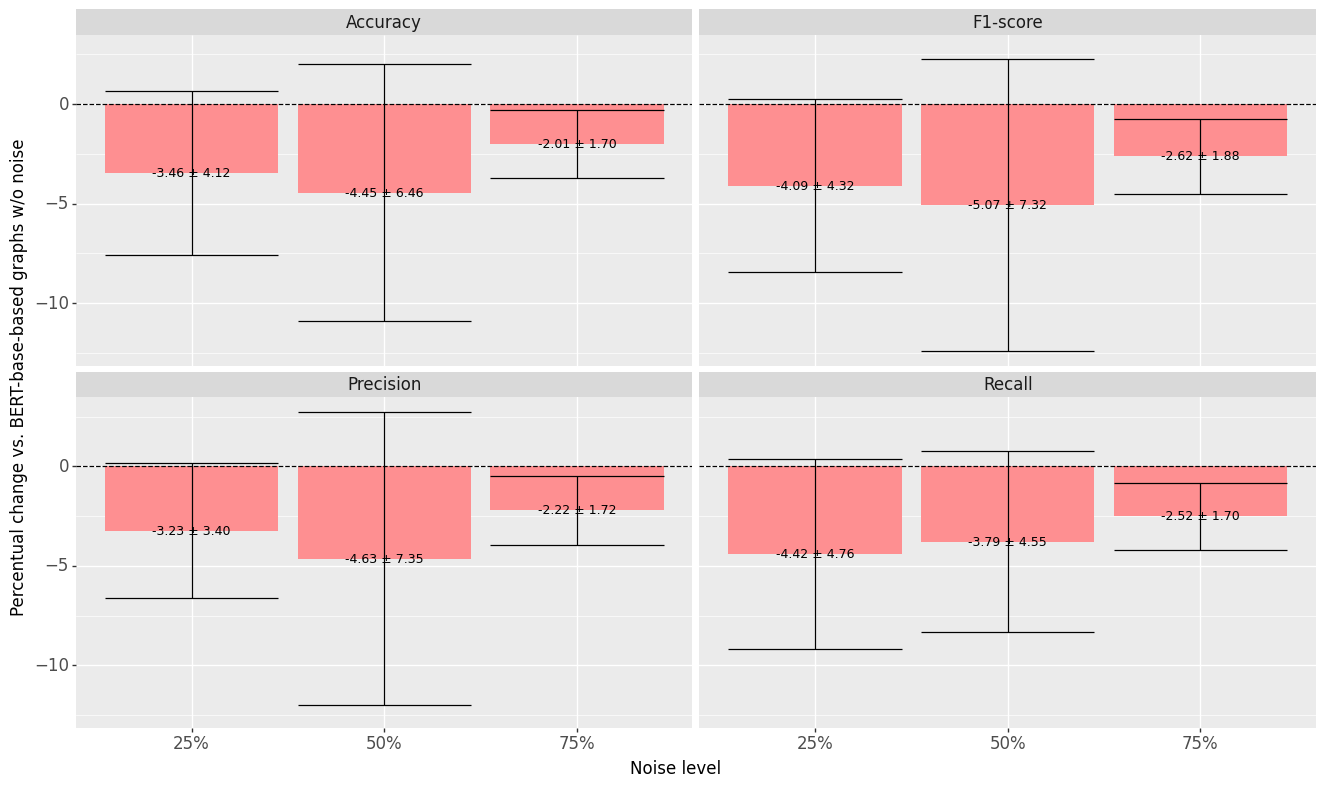

<ggplot: (816570329)>

In [103]:
p9.ggplot(best_results_df_grouped[best_results_df_grouped['split'] == 'Testing'],
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(label = 'label'), position = p9.position_dodge2(width = .9), size = 9) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Noise level') + \
  p9.ylab('Percentual change vs. BERT-base-based graphs w/o noise') + \
  p9.labs(fill = 'Split') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

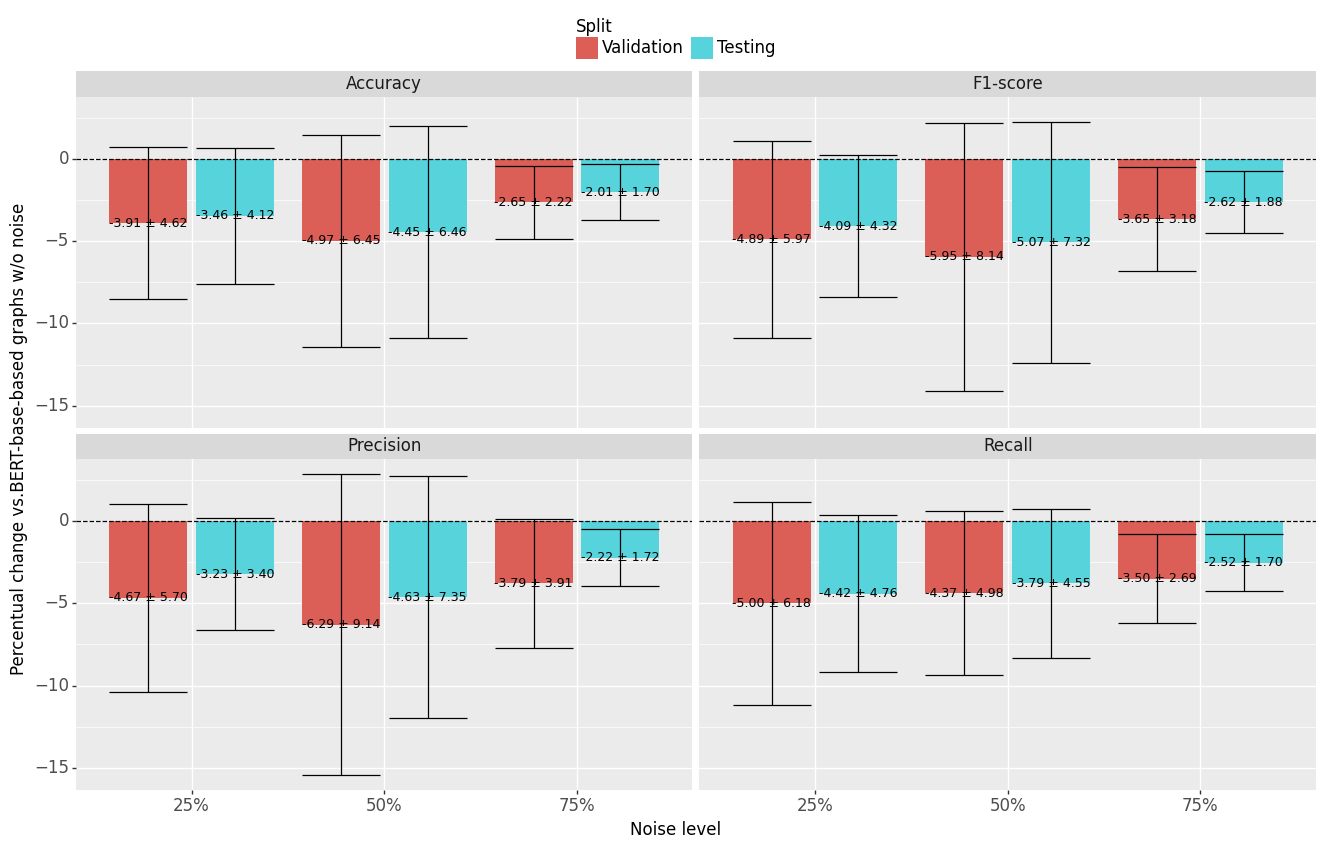

<ggplot: (816728740)>

In [104]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean', fill = 'split')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(label = 'label'), position = p9.position_dodge2(width = .9), size = 9) + \
  p9.facet_wrap('~metric', ncol = 2) + \
  p9.xlab('Noise level') + \
  p9.ylab('Percentual change vs.BERT-base-based graphs w/o noise') + \
  p9.labs(fill = 'Split') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

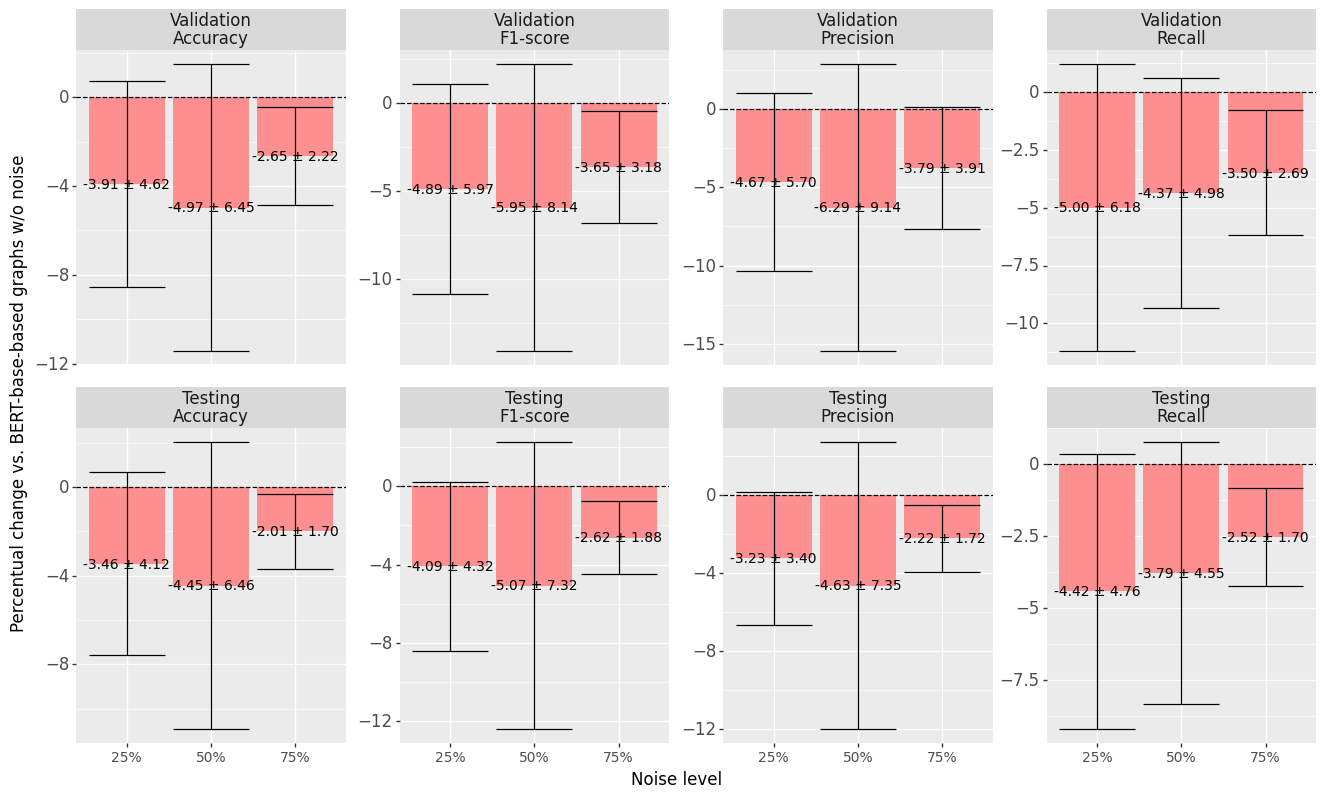

<ggplot: (819714436)>

In [105]:
p9.ggplot(best_results_df_grouped,
  p9.aes(x = 'ablation_operation', y = 'mean')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_hline(yintercept = 0, linetype = 'dashed') + \
  p9.geom_errorbar(p9.aes(ymin = 'mean - std', ymax = 'mean + std'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(label = 'label'), position = p9.position_dodge2(width = .9), size = 10) + \
  p9.facet_wrap('~split+metric', ncol = 4, scales = 'free_y') + \
  p9.xlab('Noise level') + \
  p9.ylab('Percentual change vs. BERT-base-based graphs w/o noise') + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12),
    axis_text_x = p9.element_text(size = 10),
    subplots_adjust = {
      'hspace': 0.2,
      'wspace': 0.2
    }
  )

# Statistical significance

In [111]:
def get_best_results_for_statistics(datasets, gnns, llms, methods, aggregations, target_metrics):
  results = list()
  for dataset, target_metric in zip(datasets, target_metrics):
    for gnn in gnns:
      for llm in llms:
        for method in methods:
          for aggregation in aggregations:
            df = load_performance_metrics(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation)
            # 'trial', 'random_state', 'split', 'accuracy', 'f1_score', 'precision', 'recall'
            df = remove_trials_with_exceptions(df)
            
            df_aggregated = df.groupby(['trial', 'split']).agg({
              'accuracy' : ['mean', 'std'],
              'f1_score' : ['mean', 'std'],
              'precision' : ['mean', 'std'],
              'recall' : ['mean', 'std'],
            }).reset_index()
            df_aggregated.columns = df_aggregated.columns.map('_'.join).str.strip('_')
            
            best_trial_number = df_aggregated.sort_values(by = ['split', f'{target_metric}_mean', f'{target_metric}_std'], ascending = [True, False, True]).reset_index(drop = True).iloc[0]['trial']
            best_trial = df[df['trial'] == best_trial_number]
            best_trial['target_metric'] = best_trial[target_metric]
            best_trial.drop(columns = ['accuracy', 'f1_score', 'precision', 'recall'], inplace = True)
            best_trial['dataset'] = dataset
            best_trial['gnn'] = gnn
            best_trial['method'] = method
            best_trial['aggregation'] = aggregation
            best_trial['llm'] = llm
            best_trial['ablation_operation'] = 'No_Ablation'
            best_trial['node_ablation_noise_level'] = 0.0
            best_trial['node_ablation_feature_noise_level'] = 0.0
            results.append(best_trial)

  return pd.concat(results, axis = 0)

In [110]:
def get_best_results_for_statistics_ablations(datasets, gnns, llms, methods, aggregations, ablation_operations, node_ablation_noise_levels, node_ablation_feature_noise_levels, target_metrics):
  results = list()
  for dataset, target_metric in zip(datasets, target_metrics):
    for gnn in gnns:
      for llm in llms:
        for method in methods:
          for aggregation in aggregations:
            for ablation_operation in ablation_operations:
              for node_ablation_noise_level in node_ablation_noise_levels:
                for node_ablation_feature_noise_level in node_ablation_feature_noise_levels:
                  df = load_performance_metrics_ablation(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation, ablation_operation = ablation_operation, node_ablation_noise_level = node_ablation_noise_level, node_ablation_feature_noise_level = node_ablation_feature_noise_level)
                  # 'trial', 'random_state', 'split', 'accuracy', 'f1_score', 'precision', 'recall'
                  df = remove_trials_with_exceptions(df)
                  
                  df_aggregated = df.groupby(['trial', 'split']).agg({
                    'accuracy' : ['mean', 'std'],
                    'f1_score' : ['mean', 'std'],
                    'precision' : ['mean', 'std'],
                    'recall' : ['mean', 'std'],
                  }).reset_index()
                  df_aggregated.columns = df_aggregated.columns.map('_'.join).str.strip('_')
                  
                  best_trial_number = df_aggregated.sort_values(by = ['split', f'{target_metric}_mean', f'{target_metric}_std'], ascending = [True, False, True]).reset_index(drop = True).iloc[0]['trial']
                  best_trial = df[df['trial'] == best_trial_number]
                  best_trial['target_metric'] = best_trial[target_metric]
                  best_trial.drop(columns = ['accuracy', 'f1_score', 'precision', 'recall'], inplace = True)
                  best_trial['dataset'] = dataset
                  best_trial['gnn'] = gnn
                  best_trial['method'] = method
                  best_trial['aggregation'] = aggregation
                  best_trial['llm'] = llm
                  best_trial['ablation_operation'] = ablation_operation
                  best_trial['node_ablation_noise_level'] = node_ablation_noise_level
                  best_trial['node_ablation_feature_noise_level'] = node_ablation_feature_noise_level
                  results.append(best_trial)

  return pd.concat(results, axis = 0)

### Edges

In [116]:
stats_df = pd.concat([
  get_best_results_for_statistics(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation']
  ),
  get_best_results_for_statistics_ablations(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation'],
    ablation_operations = ['Random_Attentions', 'Random_Weights', 'Unitary_Weights', 'Single_Unitary_Weight'],
    node_ablation_noise_levels = [0.0],
    node_ablation_feature_noise_levels = [0.0]
  ),
])

In [119]:
# Based on https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/
for i, split in enumerate(['validation', 'test']):
  print(split)
  split_df = stats_df[(stats_df['split'] == split)].drop(columns = ['trial', 'split', 'gnn', 'method', 'aggregation']) \
    .pivot(index = ['dataset', 'random_state'], columns = 'ablation_operation', values = 'target_metric') \
    .reset_index() \
    .sort_values(by = ['dataset', 'random_state'])
  
  for (x, y) in itertools.combinations(['No_Ablation', 'Random_Attentions', 'Random_Weights', 'Unitary_Weights', 'Single_Unitary_Weight'], 2):
    # H0: Mean Grouped and Surrogate scores are equal
    # H1: Mean Grouped and Surrogate scores are not equal
    statistic, p_value = stats.ttest_rel(split_df[x], split_df[y])
    # 95% confidence -- p-value < 0.05 => reject the null hypothesis (H0), i.e., the true mean test score is different between the approaches
    print(f'{x} - {y}:', 'Statistic:', statistic, 'P-value:', p_value, 'Reject H0?', p_value < 0.05)
  print('')

validation
No_Ablation - Random_Attentions: Statistic: 3.6795237951539024 P-value: 0.0007044920745869563 Reject H0? True
No_Ablation - Random_Weights: Statistic: 1.984864852274617 P-value: 0.054225577959618604 Reject H0? False
No_Ablation - Unitary_Weights: Statistic: 2.632228164008617 P-value: 0.012091311854401285 Reject H0? True
No_Ablation - Single_Unitary_Weight: Statistic: 0.8810729052143876 P-value: 0.38367612107768945 Reject H0? False
Random_Attentions - Random_Weights: Statistic: -3.0388236348870463 P-value: 0.00422550612930883 Reject H0? True
Random_Attentions - Unitary_Weights: Statistic: -2.5469902681779444 P-value: 0.014923983303034759 Reject H0? True
Random_Attentions - Single_Unitary_Weight: Statistic: -3.5686888047673833 P-value: 0.0009701437112742322 Reject H0? True
Random_Weights - Unitary_Weights: Statistic: 1.3513887482027733 P-value: 0.18435828426279466 Reject H0? False
Random_Weights - Single_Unitary_Weight: Statistic: -2.0132530590108315 P-value: 0.051026557519365

### Nodes

In [120]:
stats_df = pd.concat([
  get_best_results_for_statistics(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Surrogate'], #['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation']
  ),
  get_best_results_for_statistics_ablations(
    datasets = ['SST-2', 'R8', 'Ohsumed', 'IMDb-top_1000'],
    target_metrics = ['accuracy', 'f1_score', 'f1_score', 'accuracy'],
    gnns = ['GATv2'],
    llms = ['google-bert-bert-base-uncased'],
    methods = ['Surrogate'], #['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation'],
    ablation_operations = ['No_Ablation'],
    node_ablation_noise_levels = [1.0],
    node_ablation_feature_noise_levels = [0.25, 0.5, 0.75]
  ),
])

In [121]:
stats_df['ablation_operation'] = stats_df['node_ablation_feature_noise_level'].map(lambda x : f'{int(x * 100)}%')

In [122]:
# Based on https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/
for i, split in enumerate(['validation', 'test']):
  print(split)
  split_df = stats_df[(stats_df['split'] == split)].drop(columns = ['trial', 'split', 'gnn', 'method', 'aggregation']) \
    .pivot(index = ['dataset', 'random_state'], columns = 'ablation_operation', values = 'target_metric') \
    .reset_index() \
    .sort_values(by = ['dataset', 'random_state'])
  
  for (x, y) in itertools.combinations(['0%', '25%', '50%', '75%'], 2):
    # H0: Mean Grouped and Surrogate scores are equal
    # H1: Mean Grouped and Surrogate scores are not equal
    statistic, p_value = stats.ttest_rel(split_df[x], split_df[y])
    # 95% confidence -- p-value < 0.05 => reject the null hypothesis (H0), i.e., the true mean test score is different between the approaches
    print(f'{x} - {y}:', 'Statistic:', statistic, 'P-value:', p_value, 'Reject H0?', p_value < 0.05)
  print('')

validation
0% - 25%: Statistic: 10.529214000657769 P-value: 5.821920408598012e-13 Reject H0? True
0% - 50%: Statistic: 10.799905822377166 P-value: 2.7688066998444737e-13 Reject H0? True
0% - 75%: Statistic: 9.778826740232194 P-value: 4.802396303005913e-12 Reject H0? True
25% - 50%: Statistic: 5.703232746172289 P-value: 1.3379116021601003e-06 Reject H0? True
25% - 75%: Statistic: 5.936009571096867 P-value: 6.355287247853317e-07 Reject H0? True
50% - 75%: Statistic: 4.306972634451786 P-value: 0.00010821840845306553 Reject H0? True

test
0% - 25%: Statistic: 12.489362545923914 P-value: 3.3131751207712642e-15 Reject H0? True
0% - 50%: Statistic: 10.401597637520675 P-value: 8.292259543955123e-13 Reject H0? True
0% - 75%: Statistic: 10.110463996323087 P-value: 1.8730195258120197e-12 Reject H0? True
25% - 50%: Statistic: 3.67287688670174 P-value: 0.0007182166205358904 Reject H0? True
25% - 75%: Statistic: 5.377249839468226 P-value: 3.7860314845601824e-06 Reject H0? True
50% - 75%: Statistic: 